# Capital Raising from the Crowd Analysis

## Business Case

In 2016 the Jobs Act passed which empowered issuers to raise money from retail or non-accredited investors. 90% of startups fail to secure venture funding and so raising money via Reg CF or Reg A has become a viable alternative.  When offering securities to the public, the greatest question issuers will face is "will there be appetite from the public"?

While many issuers are successful in communicating their message to the public and securing funding, others are not as fortunate.  Offering these securities to the public can be an expensive endeavour, with Reg A offerings costing up to 400k.  Knowing which companies will be successful ahead of their fundraising launch would be valuable information.

## Objective

Using data from funding portals, we are going to create a linear regression and build a few models (decision trees, random forest, and KNN) to see if we can predict which offerings will be successful.  Success will be defined as raising at least 500k.  The process for Reg A and CF is very similar so we will make reg CF the focus of our model because there is much more data to review and these tend to be a much less expensive offering to launch.

## Methodology

1. Clean data
2. Convert Data to relevant numeric features for quantification
3. Perform EDA to get a better understanding of each feature
4. Linear Regression
5. Decision Trees, Random Forest, KNN
6. Conclusion of findings

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score
import scipy.stats as stats
from matplotlib.ticker import PercentFormatter


In [2]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,\
    precision_score, recall_score, accuracy_score, f1_score, log_loss,\
    roc_curve, roc_auc_score, classification_report
from sklearn import tree
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
import pandas as pd
import warnings
warnings.simplefilter('ignore')
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from xgboost import plot_importance

from math import log
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree

from collections import Counter
import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE


from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

## Cleaning

In [3]:
#show csv file
pd.set_option('display.max_columns', 30)
df= pd.read_csv("Companies Search Export.csv")
df

company  status  analyst report rating  \
0               Jack Henry  Active  Pending Review      -   
1     The Empowered Cookie  Active  Pending Review      -   
2          Super Processor  Active  Pending Review      -   
3           Recovering Bro  Active  Pending Review      -   
4         Mama Bevs Bakery  Active  Pending Review      -   
...                    ...     ...             ...    ...   
6297            sweetgreen  Public       No Report      -   
6298       Brilliant Earth  Public       No Report      -   
6299          Clear Secure  Public       No Report      -   
6300                  FIGS  Public   Deal To Watch      -   
6301            NerdWallet  Public       No Report      -   

                                       industry                 platform  \
0                        Beauty & Personal Care                 Wefunder   
1                 Food, Beverage, & Restaurants                 Wefunder   
2     Financial & Insurance Products & Services  Mundial Financial Group   
3                  Healthcare & Pharmaceuticals               Netcapital   
4                 Food, Beverage, & Restaurants                 MainVest   
...                                         ...                      ...   
6297              Food, Beverage, & Restaurants                Robinhood   
6298        Consumer Products, Goods & Services                Robinhood   
6299         Security, Cybersecurity, & Defense                Robinhood   
6300                          Apparel & Fashion                Robinhood   
6301  Financial & Insurance Products & Services                Robinhood   

      Valuation / Cap    security type momentum amount raised start date  \
0        $10,000,000              SAFE      Hot     $116,550    2/3/2023   
1         $3,500,000              SAFE      New             -   2/3/2023   
2        $70,000,000   Equity - Common      New             -   2/2/2023   
3         $7,920,000   Equity - Common     Cool       $1,101    2/2/2023   
4                   -    Revenue Share     Cold         $100    2/2/2023   
...               ...              ...      ...           ...        ...   
6297  $2,700,000,000   Equity - Common        -             -  6/17/2021   
6298  $1,100,000,000   Equity - Common        -             -  6/11/2021   
6299  $4,400,000,000   Equity - Common        -             -   6/7/2021   
6300  $2,800,000,000   Equity - Common        -             -   5/5/2021   
6301  $1,200,000,000   Equity - Common        -             -   5/3/2021   

      close date annual revenue revenue multiple investors  \
0      4/30/2023              -                -        29   
1      4/30/2023              -                -         -   
2      4/30/2023              -                -         -   
3       4/3/2023              -                -         -   
4       4/3/2023              -                -         1   
...          ...            ...              ...       ...   
6297  11/18/2021  $220,615,000             12.2x         -   
6298   9/23/2021  $251,820,000              4.4x         -   
6299   6/30/2021  $230,796,000             19.1x         -   
6300   9/27/2021  $263,112,000             10.6x         -   
6301   11/4/2021    $5,300,000            226.4x         -   

     average daily raise min investment reg type minority founders  \
0              $116,550           $500     RegCF                 -   
1                      -          $100     RegCF                 -   
2                      -          $510     RegCF                 -   
3                $1,101            $99     RegCF                 -   
4                  $100           $100     RegCF                 -   
...                  ...            ...      ...               ...   
6297                   -              -      S-1                 -   
6298                   -              -      S-1                 -   
6299                   -              -      S-1                 -   
6300           

In [4]:
df.columns

Index(['company', 'status', 'analyst report', 'rating', 'industry', 'platform',
       'Valuation / Cap', 'security type', 'momentum', 'amount raised',
       'start date', 'close date', 'annual revenue', 'revenue multiple',
       'investors', 'average daily raise', 'min investment', 'reg type',
       'minority founders', 'Women Founders', 'lgbtq founders',
       'social impact', 'state'],
      dtype='object')

In [5]:
df['reg type'].value_counts()

RegCF        5485
RegA+         273
RegD 506b     251
RegD 506c     202
TTW            72
S-1            19
Name: reg type, dtype: int64

In [6]:
#check value counts for founders
print(df['minority founders'].value_counts())
print(df['Women Founders'].value_counts())
print(df['lgbtq founders'].value_counts())

-      5085
Yes    1217
Name: minority founders, dtype: int64
-      5049
Yes    1253
Name: Women Founders, dtype: int64
-      6264
Yes      38
Name: lgbtq founders, dtype: int64


In [7]:
#dropping non impactful columns
df.drop(['analyst report', 'rating','lgbtq founders', 'state'], axis=1, inplace=True)
df

company  status                                   industry  \
0               Jack Henry  Active                     Beauty & Personal Care   
1     The Empowered Cookie  Active              Food, Beverage, & Restaurants   
2          Super Processor  Active  Financial & Insurance Products & Services   
3           Recovering Bro  Active               Healthcare & Pharmaceuticals   
4         Mama Bevs Bakery  Active              Food, Beverage, & Restaurants   
...                    ...     ...                                        ...   
6297            sweetgreen  Public              Food, Beverage, & Restaurants   
6298       Brilliant Earth  Public        Consumer Products, Goods & Services   
6299          Clear Secure  Public         Security, Cybersecurity, & Defense   
6300                  FIGS  Public                          Apparel & Fashion   
6301            NerdWallet  Public  Financial & Insurance Products & Services   

                     platform  Valuation / Cap    security type momentum  \
0                    Wefunder     $10,000,000              SAFE      Hot   
1                    Wefunder      $3,500,000              SAFE      New   
2     Mundial Financial Group     $70,000,000   Equity - Common      New   
3                  Netcapital      $7,920,000   Equity - Common     Cool   
4                    MainVest                -    Revenue Share     Cold   
...                       ...              ...              ...      ...   
6297                Robinhood  $2,700,000,000   Equity - Common        -   
6298                Robinhood  $1,100,000,000   Equity - Common        -   
6299                Robinhood  $4,400,000,000   Equity - Common        -   
6300                Robinhood  $2,800,000,000   Equity - Common        -   
6301                Robinhood  $1,200,000,000   Equity - Common        -   

     amount raised start date  close date annual revenue revenue multiple  \
0        $116,550    2/3/2023   4/30/2023              -                -   
1                -   2/3/2023   4/30/2023              -                -   
2                -   2/2/2023   4/30/2023              -                -   
3          $1,101    2/2/2023    4/3/2023              -                -   
4            $100    2/2/2023    4/3/2023              -                -   
...            ...        ...         ...            ...              ...   
6297             -  6/17/2021  11/18/2021  $220,615,000             12.2x   
6298             -  6/11/2021   9/23/2021  $251,820,000              4.4x   
6299             -   6/7/2021   6/30/2021  $230,796,000             19.1x   
6300             -   5/5/2021   9/27/2021  $263,112,000             10.6x   
6301             -   5/3/2021   11/4/2021    $5,300,000            226.4x   

     investors average daily raise min investment reg type minority founders  \
0           29           $116,550           $500     RegCF                 -   
1            -                   -          $100     RegCF                 -   
2            -                   -          $510     RegCF                 -   
3            -             $1,101            $99     RegCF                 -   
4            1               $100           $100     RegCF                 -   
...        ...                 ...            ...      ...               ...   
6297         -                   -              -      S-1                 -   
6298         -                   -              -      S-1                 -   
6299         -                   -              -      S-1                 -   
6300         -                   -              -      S-1                 -   
6301         -                   -              -      S-1               Yes   

     Women Founders social impact  
0                 -             -  
1                 -             -  
2                 -             -  
3                 -             -  
4                 -             -  
...             ...           .

In [8]:
#checking value counts for Reg CF offerings
df['company'].value_counts()

CropX                   9
StartEngine             8
KingsCrowd              7
enVerid                 7
Atlis Motor Vehicles    7
                       ..
CineLogic               1
ACFN Franchised         1
Starco Brands           1
Amplified Ale Works     1
Felix Gray              1
Name: company, Length: 5337, dtype: int64

In [9]:
#checking momentum
#most offerings are "closed", momentum not important
df['momentum'].value_counts()

Closed    5162
-          535
Cold       413
Cool        76
Warm        75
Hot         36
New          5
Name: momentum, dtype: int64

In [10]:
#drop momentum
#df.drop(['momentum'], axis=1, inplace=True)
#df

In [11]:
#checking data dypes
df.dtypes

company                object
status                 object
industry               object
platform               object
Valuation / Cap        object
security type          object
momentum               object
amount raised          object
start date             object
close date             object
annual revenue         object
revenue multiple       object
investors              object
average daily raise    object
min investment         object
reg type               object
minority founders      object
Women Founders         object
social impact          object
dtype: object

In [12]:
#Drop $ for integer conversion
df['Valuation / Cap']= df['Valuation / Cap'].map(lambda x: x[1:])
df['amount raised']= df['amount raised'].map(lambda x: x[1:])
df['annual revenue']= df['annual revenue'].map(lambda x: x[1:])
df['average daily raise']= df['average daily raise'].map(lambda x: x[1:])
df['min investment']= df['min investment'].map(lambda x: x[1:])
df

company  status                                   industry  \
0               Jack Henry  Active                     Beauty & Personal Care   
1     The Empowered Cookie  Active              Food, Beverage, & Restaurants   
2          Super Processor  Active  Financial & Insurance Products & Services   
3           Recovering Bro  Active               Healthcare & Pharmaceuticals   
4         Mama Bevs Bakery  Active              Food, Beverage, & Restaurants   
...                    ...     ...                                        ...   
6297            sweetgreen  Public              Food, Beverage, & Restaurants   
6298       Brilliant Earth  Public        Consumer Products, Goods & Services   
6299          Clear Secure  Public         Security, Cybersecurity, & Defense   
6300                  FIGS  Public                          Apparel & Fashion   
6301            NerdWallet  Public  Financial & Insurance Products & Services   

                     platform Valuation / Cap    security type momentum  \
0                    Wefunder     10,000,000              SAFE      Hot   
1                    Wefunder      3,500,000              SAFE      New   
2     Mundial Financial Group     70,000,000   Equity - Common      New   
3                  Netcapital      7,920,000   Equity - Common     Cool   
4                    MainVest                    Revenue Share     Cold   
...                       ...             ...              ...      ...   
6297                Robinhood  2,700,000,000   Equity - Common        -   
6298                Robinhood  1,100,000,000   Equity - Common        -   
6299                Robinhood  4,400,000,000   Equity - Common        -   
6300                Robinhood  2,800,000,000   Equity - Common        -   
6301                Robinhood  1,200,000,000   Equity - Common        -   

     amount raised start date  close date annual revenue revenue multiple  \
0         116,550    2/3/2023   4/30/2023                               -   
1                    2/3/2023   4/30/2023                               -   
2                    2/2/2023   4/30/2023                               -   
3           1,101    2/2/2023    4/3/2023                               -   
4             100    2/2/2023    4/3/2023                               -   
...            ...        ...         ...            ...              ...   
6297                6/17/2021  11/18/2021   220,615,000             12.2x   
6298                6/11/2021   9/23/2021   251,820,000              4.4x   
6299                 6/7/2021   6/30/2021   230,796,000             19.1x   
6300                 5/5/2021   9/27/2021   263,112,000             10.6x   
6301                 5/3/2021   11/4/2021     5,300,000            226.4x   

     investors average daily raise min investment reg type minority founders  \
0           29            116,550            500     RegCF                 -   
1            -                               100     RegCF                 -   
2            -                               510     RegCF                 -   
3            -              1,101             99     RegCF                 -   
4            1                100            100     RegCF                 -   
...        ...                 ...            ...      ...               ...   
6297         -                                         S-1                 -   
6298         -                                         S-1                 -   
6299         -                                         S-1                 -   
6300         -                                         S-1                 -   
6301         -                                         S-1               Yes   

     Women Founders social impact  
0                 -             -  
1                 -             -  
2                 -             -  
3                 -             -  
4                 -             -  
...             ...           ...  
6297   

In [13]:
#converting blank spaces to 0
df=df.replace('', 0)
df

company  status                                   industry  \
0               Jack Henry  Active                     Beauty & Personal Care   
1     The Empowered Cookie  Active              Food, Beverage, & Restaurants   
2          Super Processor  Active  Financial & Insurance Products & Services   
3           Recovering Bro  Active               Healthcare & Pharmaceuticals   
4         Mama Bevs Bakery  Active              Food, Beverage, & Restaurants   
...                    ...     ...                                        ...   
6297            sweetgreen  Public              Food, Beverage, & Restaurants   
6298       Brilliant Earth  Public        Consumer Products, Goods & Services   
6299          Clear Secure  Public         Security, Cybersecurity, & Defense   
6300                  FIGS  Public                          Apparel & Fashion   
6301            NerdWallet  Public  Financial & Insurance Products & Services   

                     platform Valuation / Cap    security type momentum  \
0                    Wefunder     10,000,000              SAFE      Hot   
1                    Wefunder      3,500,000              SAFE      New   
2     Mundial Financial Group     70,000,000   Equity - Common      New   
3                  Netcapital      7,920,000   Equity - Common     Cool   
4                    MainVest               0    Revenue Share     Cold   
...                       ...             ...              ...      ...   
6297                Robinhood  2,700,000,000   Equity - Common        -   
6298                Robinhood  1,100,000,000   Equity - Common        -   
6299                Robinhood  4,400,000,000   Equity - Common        -   
6300                Robinhood  2,800,000,000   Equity - Common        -   
6301                Robinhood  1,200,000,000   Equity - Common        -   

     amount raised start date  close date annual revenue revenue multiple  \
0         116,550    2/3/2023   4/30/2023              0                -   
1                0   2/3/2023   4/30/2023              0                -   
2                0   2/2/2023   4/30/2023              0                -   
3           1,101    2/2/2023    4/3/2023              0                -   
4             100    2/2/2023    4/3/2023              0                -   
...            ...        ...         ...            ...              ...   
6297             0  6/17/2021  11/18/2021   220,615,000             12.2x   
6298             0  6/11/2021   9/23/2021   251,820,000              4.4x   
6299             0   6/7/2021   6/30/2021   230,796,000             19.1x   
6300             0   5/5/2021   9/27/2021   263,112,000             10.6x   
6301             0   5/3/2021   11/4/2021     5,300,000            226.4x   

     investors average daily raise min investment reg type minority founders  \
0           29            116,550            500     RegCF                 -   
1            -                   0           100     RegCF                 -   
2            -                   0           510     RegCF                 -   
3            -              1,101             99     RegCF                 -   
4            1                100            100     RegCF                 -   
...        ...                 ...            ...      ...               ...   
6297         -                   0              0      S-1                 -   
6298         -                   0              0      S-1                 -   
6299         -                   0              0      S-1                 -   
6300         -                   0              0      S-1                 -   
6301         -                   0              0      S-1               Yes   

     Women Founders social impact  
0                 -             -  
1                 -             -  
2                 -             -  
3                 -             -  
4                 -             -  
...             ...           ...  
6297   

In [14]:
#converting - to 0
df=df.replace('-', 0)
df

company  status                                   industry  \
0               Jack Henry  Active                     Beauty & Personal Care   
1     The Empowered Cookie  Active              Food, Beverage, & Restaurants   
2          Super Processor  Active  Financial & Insurance Products & Services   
3           Recovering Bro  Active               Healthcare & Pharmaceuticals   
4         Mama Bevs Bakery  Active              Food, Beverage, & Restaurants   
...                    ...     ...                                        ...   
6297            sweetgreen  Public              Food, Beverage, & Restaurants   
6298       Brilliant Earth  Public        Consumer Products, Goods & Services   
6299          Clear Secure  Public         Security, Cybersecurity, & Defense   
6300                  FIGS  Public                          Apparel & Fashion   
6301            NerdWallet  Public  Financial & Insurance Products & Services   

                     platform Valuation / Cap    security type momentum  \
0                    Wefunder     10,000,000              SAFE      Hot   
1                    Wefunder      3,500,000              SAFE      New   
2     Mundial Financial Group     70,000,000   Equity - Common      New   
3                  Netcapital      7,920,000   Equity - Common     Cool   
4                    MainVest               0    Revenue Share     Cold   
...                       ...             ...              ...      ...   
6297                Robinhood  2,700,000,000   Equity - Common        0   
6298                Robinhood  1,100,000,000   Equity - Common        0   
6299                Robinhood  4,400,000,000   Equity - Common        0   
6300                Robinhood  2,800,000,000   Equity - Common        0   
6301                Robinhood  1,200,000,000   Equity - Common        0   

     amount raised start date  close date annual revenue revenue multiple  \
0         116,550    2/3/2023   4/30/2023              0                0   
1                0   2/3/2023   4/30/2023              0                0   
2                0   2/2/2023   4/30/2023              0                0   
3           1,101    2/2/2023    4/3/2023              0                0   
4             100    2/2/2023    4/3/2023              0                0   
...            ...        ...         ...            ...              ...   
6297             0  6/17/2021  11/18/2021   220,615,000             12.2x   
6298             0  6/11/2021   9/23/2021   251,820,000              4.4x   
6299             0   6/7/2021   6/30/2021   230,796,000             19.1x   
6300             0   5/5/2021   9/27/2021   263,112,000             10.6x   
6301             0   5/3/2021   11/4/2021     5,300,000            226.4x   

     investors average daily raise min investment reg type minority founders  \
0           29            116,550            500     RegCF                 0   
1            0                   0           100     RegCF                 0   
2            0                   0           510     RegCF                 0   
3            0              1,101             99     RegCF                 0   
4            1                100            100     RegCF                 0   
...        ...                 ...            ...      ...               ...   
6297         0                   0              0      S-1                 0   
6298         0                   0              0      S-1                 0   
6299         0                   0              0      S-1                 0   
6300         0                   0              0      S-1                 0   
6301         0                   0              0      S-1               Yes   

     Women Founders social impact  
0                 0             0  
1                 0             0  
2                 0             0  
3                 0             0  
4                 0             0  
...             ...           ...  
6297   

In [15]:
df=df.replace('x', '')

We need to convert all numerical columns to integers to quanitfy them.

In [16]:
df

company  status                                   industry  \
0               Jack Henry  Active                     Beauty & Personal Care   
1     The Empowered Cookie  Active              Food, Beverage, & Restaurants   
2          Super Processor  Active  Financial & Insurance Products & Services   
3           Recovering Bro  Active               Healthcare & Pharmaceuticals   
4         Mama Bevs Bakery  Active              Food, Beverage, & Restaurants   
...                    ...     ...                                        ...   
6297            sweetgreen  Public              Food, Beverage, & Restaurants   
6298       Brilliant Earth  Public        Consumer Products, Goods & Services   
6299          Clear Secure  Public         Security, Cybersecurity, & Defense   
6300                  FIGS  Public                          Apparel & Fashion   
6301            NerdWallet  Public  Financial & Insurance Products & Services   

                     platform Valuation / Cap    security type momentum  \
0                    Wefunder     10,000,000              SAFE      Hot   
1                    Wefunder      3,500,000              SAFE      New   
2     Mundial Financial Group     70,000,000   Equity - Common      New   
3                  Netcapital      7,920,000   Equity - Common     Cool   
4                    MainVest               0    Revenue Share     Cold   
...                       ...             ...              ...      ...   
6297                Robinhood  2,700,000,000   Equity - Common        0   
6298                Robinhood  1,100,000,000   Equity - Common        0   
6299                Robinhood  4,400,000,000   Equity - Common        0   
6300                Robinhood  2,800,000,000   Equity - Common        0   
6301                Robinhood  1,200,000,000   Equity - Common        0   

     amount raised start date  close date annual revenue revenue multiple  \
0         116,550    2/3/2023   4/30/2023              0                0   
1                0   2/3/2023   4/30/2023              0                0   
2                0   2/2/2023   4/30/2023              0                0   
3           1,101    2/2/2023    4/3/2023              0                0   
4             100    2/2/2023    4/3/2023              0                0   
...            ...        ...         ...            ...              ...   
6297             0  6/17/2021  11/18/2021   220,615,000             12.2x   
6298             0  6/11/2021   9/23/2021   251,820,000              4.4x   
6299             0   6/7/2021   6/30/2021   230,796,000             19.1x   
6300             0   5/5/2021   9/27/2021   263,112,000             10.6x   
6301             0   5/3/2021   11/4/2021     5,300,000            226.4x   

     investors average daily raise min investment reg type minority founders  \
0           29            116,550            500     RegCF                 0   
1            0                   0           100     RegCF                 0   
2            0                   0           510     RegCF                 0   
3            0              1,101             99     RegCF                 0   
4            1                100            100     RegCF                 0   
...        ...                 ...            ...      ...               ...   
6297         0                   0              0      S-1                 0   
6298         0                   0              0      S-1                 0   
6299         0                   0              0      S-1                 0   
6300         0                   0              0      S-1                 0   
6301         0                   0              0      S-1               Yes   

     Women Founders social impact  
0                 0             0  
1                 0             0  
2                 0             0  
3                 0             0  
4                 0             0  
...             ...           ...  
6297   

In [17]:
df.isna().sum()

company                0
status                 0
industry               0
platform               0
Valuation / Cap        0
security type          0
momentum               0
amount raised          0
start date             0
close date             0
annual revenue         0
revenue multiple       0
investors              0
average daily raise    0
min investment         0
reg type               0
minority founders      0
Women Founders         0
social impact          0
dtype: int64

In [18]:
#removing commas
df['Valuation / Cap']= df['Valuation / Cap'].str.replace(',','')
df['amount raised']= df['amount raised'].str.replace(',','')
df['annual revenue']= df['annual revenue'].str.replace(',','')
df['average daily raise']= df['average daily raise'].str.replace(',','')
df['min investment']= df['min investment'].str.replace(',','')
df['revenue multiple']= df['revenue multiple'].str.replace('x','')
df['revenue multiple']= df['revenue multiple'].str.replace('+','')
df['investors']= df['investors'].str.replace(',', '')
df

company  status                                   industry  \
0               Jack Henry  Active                     Beauty & Personal Care   
1     The Empowered Cookie  Active              Food, Beverage, & Restaurants   
2          Super Processor  Active  Financial & Insurance Products & Services   
3           Recovering Bro  Active               Healthcare & Pharmaceuticals   
4         Mama Bevs Bakery  Active              Food, Beverage, & Restaurants   
...                    ...     ...                                        ...   
6297            sweetgreen  Public              Food, Beverage, & Restaurants   
6298       Brilliant Earth  Public        Consumer Products, Goods & Services   
6299          Clear Secure  Public         Security, Cybersecurity, & Defense   
6300                  FIGS  Public                          Apparel & Fashion   
6301            NerdWallet  Public  Financial & Insurance Products & Services   

                     platform Valuation / Cap    security type momentum  \
0                    Wefunder       10000000              SAFE      Hot   
1                    Wefunder        3500000              SAFE      New   
2     Mundial Financial Group       70000000   Equity - Common      New   
3                  Netcapital        7920000   Equity - Common     Cool   
4                    MainVest             NaN    Revenue Share     Cold   
...                       ...             ...              ...      ...   
6297                Robinhood     2700000000   Equity - Common        0   
6298                Robinhood     1100000000   Equity - Common        0   
6299                Robinhood     4400000000   Equity - Common        0   
6300                Robinhood     2800000000   Equity - Common        0   
6301                Robinhood     1200000000   Equity - Common        0   

     amount raised start date  close date annual revenue revenue multiple  \
0          116550    2/3/2023   4/30/2023            NaN              NaN   
1              NaN   2/3/2023   4/30/2023            NaN              NaN   
2              NaN   2/2/2023   4/30/2023            NaN              NaN   
3            1101    2/2/2023    4/3/2023            NaN              NaN   
4             100    2/2/2023    4/3/2023            NaN              NaN   
...            ...        ...         ...            ...              ...   
6297           NaN  6/17/2021  11/18/2021     220615000              12.2   
6298           NaN  6/11/2021   9/23/2021     251820000               4.4   
6299           NaN   6/7/2021   6/30/2021     230796000              19.1   
6300           NaN   5/5/2021   9/27/2021     263112000              10.6   
6301           NaN   5/3/2021   11/4/2021       5300000             226.4   

     investors average daily raise min investment reg type minority founders  \
0           29             116550            500     RegCF                 0   
1          NaN                 NaN           100     RegCF                 0   
2          NaN                 NaN           510     RegCF                 0   
3          NaN               1101             99     RegCF                 0   
4            1                100            100     RegCF                 0   
...        ...                 ...            ...      ...               ...   
6297       NaN                 NaN            NaN      S-1                 0   
6298       NaN                 NaN            NaN      S-1                 0   
6299       NaN                 NaN            NaN      S-1                 0   
6300       NaN                 NaN            NaN      S-1                 0   
6301       NaN                 NaN            NaN      S-1               Yes   

     Women Founders social impact  
0                 0             0  
1                 0             0  
2                 0             0  
3                 0             0  
4                 0             0  
...             ...           ...  
6297   

Removing commas turned 0 into Nan values.  Lets convert back to 0.

In [19]:
df.isna().sum()

company                   0
status                    0
industry                  0
platform                  0
Valuation / Cap        1624
security type             0
momentum                  0
amount raised          1333
start date                0
close date                0
annual revenue         3904
revenue multiple       4322
investors              2057
average daily raise    1334
min investment           39
reg type                  0
minority founders         0
Women Founders            0
social impact             0
dtype: int64

In [20]:
df.fillna(0, inplace= True)
df

company  status                                   industry  \
0               Jack Henry  Active                     Beauty & Personal Care   
1     The Empowered Cookie  Active              Food, Beverage, & Restaurants   
2          Super Processor  Active  Financial & Insurance Products & Services   
3           Recovering Bro  Active               Healthcare & Pharmaceuticals   
4         Mama Bevs Bakery  Active              Food, Beverage, & Restaurants   
...                    ...     ...                                        ...   
6297            sweetgreen  Public              Food, Beverage, & Restaurants   
6298       Brilliant Earth  Public        Consumer Products, Goods & Services   
6299          Clear Secure  Public         Security, Cybersecurity, & Defense   
6300                  FIGS  Public                          Apparel & Fashion   
6301            NerdWallet  Public  Financial & Insurance Products & Services   

                     platform Valuation / Cap    security type momentum  \
0                    Wefunder       10000000              SAFE      Hot   
1                    Wefunder        3500000              SAFE      New   
2     Mundial Financial Group       70000000   Equity - Common      New   
3                  Netcapital        7920000   Equity - Common     Cool   
4                    MainVest               0    Revenue Share     Cold   
...                       ...             ...              ...      ...   
6297                Robinhood     2700000000   Equity - Common        0   
6298                Robinhood     1100000000   Equity - Common        0   
6299                Robinhood     4400000000   Equity - Common        0   
6300                Robinhood     2800000000   Equity - Common        0   
6301                Robinhood     1200000000   Equity - Common        0   

     amount raised start date  close date annual revenue revenue multiple  \
0          116550    2/3/2023   4/30/2023              0                0   
1                0   2/3/2023   4/30/2023              0                0   
2                0   2/2/2023   4/30/2023              0                0   
3            1101    2/2/2023    4/3/2023              0                0   
4             100    2/2/2023    4/3/2023              0                0   
...            ...        ...         ...            ...              ...   
6297             0  6/17/2021  11/18/2021     220615000              12.2   
6298             0  6/11/2021   9/23/2021     251820000               4.4   
6299             0   6/7/2021   6/30/2021     230796000              19.1   
6300             0   5/5/2021   9/27/2021     263112000              10.6   
6301             0   5/3/2021   11/4/2021       5300000             226.4   

     investors average daily raise min investment reg type minority founders  \
0           29             116550            500     RegCF                 0   
1            0                   0           100     RegCF                 0   
2            0                   0           510     RegCF                 0   
3            0               1101             99     RegCF                 0   
4            1                100            100     RegCF                 0   
...        ...                 ...            ...      ...               ...   
6297         0                   0              0      S-1                 0   
6298         0                   0              0      S-1                 0   
6299         0                   0              0      S-1                 0   
6300         0                   0              0      S-1                 0   
6301         0                   0              0      S-1               Yes   

     Women Founders social impact  
0                 0             0  
1                 0             0  
2                 0             0  
3                 0             0  
4                 0             0  
...             ...           ...  
6297   

In [21]:
#checking Nan is converted to 0
df.isna().sum()

company                0
status                 0
industry               0
platform               0
Valuation / Cap        0
security type          0
momentum               0
amount raised          0
start date             0
close date             0
annual revenue         0
revenue multiple       0
investors              0
average daily raise    0
min investment         0
reg type               0
minority founders      0
Women Founders         0
social impact          0
dtype: int64

In [22]:
#converting columns to integers
#dfcf['Valuation / Cap']= dfcf['Valuation / Cap'].astype(float)
df['amount raised']= df['amount raised'].astype(int)
df['annual revenue']= df['annual revenue'].astype(int)
df['average daily raise']= df['average daily raise'].astype(int)
df['min investment']= df['min investment'].astype(int)
df['revenue multiple']= df['revenue multiple'].astype(float)
df['investors']= df['investors'].astype(int)
df['minority founders']= df['minority founders'].astype(bool)
df['Women Founders']= df['Women Founders'].astype(bool)
df['social impact']= df['social impact'].astype(bool)

In [23]:
#checking for ncapped
df['Valuation / Cap'].str.contains('ncapped').value_counts()

False    4642
True       36
Name: Valuation / Cap, dtype: int64

In [24]:
#learning more about ncapped
print(df[df['Valuation / Cap']=='ncapped'])

                               company      status  \
85                             Sweater      Active   
275                        Nexus Build      Active   
299                      Gamers Heaven      Active   
329                             JackBe      Active   
444              Kilowatts For A Cause      Active   
576                         PieBooking      Active   
806                  Love Lifesciences      Funded   
862                         DiaspoCare      Funded   
1023  Broken Clock Brewing Cooperative      Funded   
1111                      Bracketology      Funded   
1214               Three Sisters Meats      Funded   
1318                              Roog      Funded   
1334                 PiggyBack Network      Funded   
1704          Firebrand Artisan Breads      Funded   
1770                  Happy Tummy Asia      Funded   
1823                  HeartFoods Group      Funded   
2130                       PrivacyWall      Funded   
2150               OurBanc C

All ncapped are either safe notes or convertible notes.  For the sake of the analysis we will assign a 0.

In [25]:
#replacing ncapped with 0
df=df.replace('ncapped', 0)

In [26]:
#numbers too large for int so will use float instead first.
df['Valuation / Cap']= df['Valuation / Cap'].astype(float)

In [27]:
#converting from float to int
df['Valuation / Cap']= df['Valuation / Cap'].astype(int)

In [28]:
df.dtypes

company                 object
status                  object
industry                object
platform                object
Valuation / Cap          int32
security type           object
momentum                object
amount raised            int32
start date              object
close date              object
annual revenue           int32
revenue multiple       float64
investors                int32
average daily raise      int32
min investment           int32
reg type                object
minority founders         bool
Women Founders            bool
social impact             bool
dtype: object

In [29]:
#converting date columns to datetime
df['start date']= pd.to_datetime(df['start date'])
df['close date']= pd.to_datetime(df['close date'])

In [30]:
df.dtypes

company                        object
status                         object
industry                       object
platform                       object
Valuation / Cap                 int32
security type                  object
momentum                       object
amount raised                   int32
start date             datetime64[ns]
close date             datetime64[ns]
annual revenue                  int32
revenue multiple              float64
investors                       int32
average daily raise             int32
min investment                  int32
reg type                       object
minority founders                bool
Women Founders                   bool
social impact                    bool
dtype: object

In [31]:
#separating DF for reg a and reg cf as these two regulations will be the focus of analysis
dfcf= df[df['reg type']=='RegCF']
dfa= df[df['reg type']=='RegA+']
dfcf

company      status  \
0               Jack Henry      Active   
1     The Empowered Cookie      Active   
2          Super Processor      Active   
3           Recovering Bro      Active   
4         Mama Bevs Bakery      Active   
...                    ...         ...   
6279      The Tetons Group  Not Funded   
6280             perceptre  Not Funded   
6281              Bitesize  Not Funded   
6282  Distributed Security  Not Funded   
6283              IGENAPPS  Not Funded   

                                         industry                 platform  \
0                          Beauty & Personal Care                 Wefunder   
1                   Food, Beverage, & Restaurants                 Wefunder   
2       Financial & Insurance Products & Services  Mundial Financial Group   
3                    Healthcare & Pharmaceuticals               Netcapital   
4                   Food, Beverage, & Restaurants                 MainVest   
...                                           ...                      ...   
6279            Media, Entertainment & Publishing              StartEngine   
6280           Security, Cybersecurity, & Defense               Netcapital   
6281  Business Services, Software, & Applications               Netcapital   
6282          Consumer Products, Goods & Services                 TruCrowd   
6283  Business Services, Software, & Applications                 Wefunder   

      Valuation / Cap    security type momentum  amount raised start date  \
0            10000000             SAFE      Hot         116550 2023-02-03   
1             3500000             SAFE      New              0 2023-02-03   
2            70000000  Equity - Common      New              0 2023-02-02   
3             7920000  Equity - Common     Cool           1101 2023-02-02   
4                   0    Revenue Share     Cold            100 2023-02-02   
...               ...              ...      ...            ...        ...   
6279          1000000  Equity - Common   Closed              0 2017-10-02   
6280          4603099  Equity - Common   Closed           1554 2017-09-27   
6281          4899500  Equity - Common   Closed            580 2017-09-25   
6282                0    Revenue Share   Closed           2400 2017-09-19   
6283          4500000             SAFE   Closed              0 2017-09-18   

     close date  annual revenue  revenue multiple  investors  \
0    2023-04-30               0               0.0         29   
1    2023-04-30               0               0.0          0   
2    2023-04-30               0               0.0          0   
3    2023-04-03               0               0.0          0   
4    2023-04-03               0               0.0          1   
...         ...             ...               ...        ...   
6279 2017-12-27               0               0.0          0   
6280 2018-01-02               0               0.0          0   
6281 2017-11-29               0               0.0          0   
6282 2018-12-31               0               0.0          8   
6283 2018-05-31               0               0.0          0   

      average daily raise  min investment reg type  minority founders  \
0                  116550             500    RegCF              False   
1                       0             100    RegCF              False   
2                       0             510    RegCF              False   
3                    1101              99    RegCF              False   
4                     100             100    RegCF              False   
...                   ...             ...      ...                ...   
6279                    0             200    RegCF              False   
6280                   16              99    RegCF              False   
6281                    9              99    RegCF              False   
6282                    5             300    RegCF              False   
6283                    0             100    RegCF              False   

      

## EDA

On March 15th, 2021 the SEC changed fundraising rules.  The maximum raise for CF went from 1.07M to 5M and Reg A went from 50m-75m.  Thus we have separated dataframes from those dates.

In [32]:
#creating separate dataframes to analyze differences between SEC rule change.
#This analysis is done in 2/23 so we will cut out companies that haven't had a few months to raise capital
mask= (dfcf['start date'] >= '2021-03-15') & (dfcf['start date'] <= '2022-11-01')
mask2= (dfcf['start date'] < '2021-03-15') 
mask3= (dfa['start date'] >= '2021-03-15') & (dfa['start date'] <= '2022-11-01')
mask4= (dfa['start date'] < '2021-03-15') 
cf= dfcf.loc[mask]
cf2= dfcf.loc[mask2]
a= dfa.loc[mask3]
a2= dfa.loc[mask4]

Lets first see how many CF offerings came before and after the rule change.

In [33]:
print(cf.shape)
print(cf2.shape)

(2440, 19)
(2686, 19)


In [34]:
#checking momenutm to see if new offerings will skew data too much
cf['momentum'].value_counts()

Closed    2161
Cold       200
Warm        31
Cool        29
0           16
Hot          3
Name: momentum, dtype: int64

#### Amount Raised

In [35]:
#checking cf stats
print(cf['amount raised'].describe())
print(cf2['amount raised'].describe())

count    2.440000e+03
mean     3.034162e+05
std      7.187129e+05
min      0.000000e+00
25%      2.906450e+04
50%      8.661300e+04
75%      2.260368e+05
max      5.000000e+06
Name: amount raised, dtype: float64
count    2.686000e+03
mean     2.225587e+05
std      4.052598e+05
min      0.000000e+00
25%      5.200000e+03
50%      6.714400e+04
75%      2.527410e+05
max      5.001541e+06
Name: amount raised, dtype: float64


In [36]:
#reseting index for dfcf1
cf.reset_index(drop=True, inplace=True)

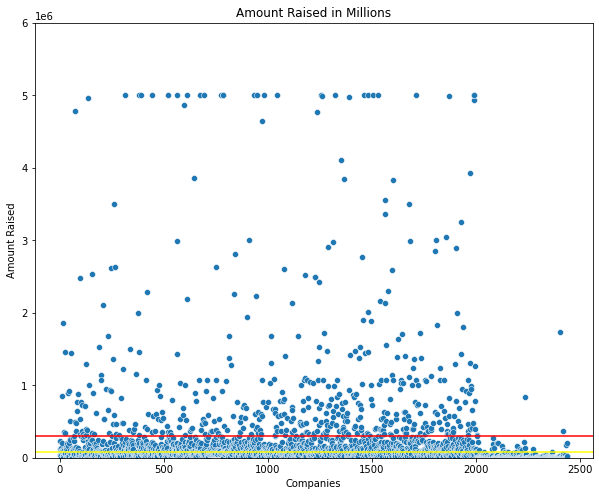

In [37]:
# data visualization. Vertical line is average runtime.
fig, ax =plt.subplots(figsize=(10,8))
ax=sns.scatterplot(x=cf.index, y=cf['amount raised'])
ax.set_title('Amount Raised in Millions')
ax.set_xlabel('Companies')
ax.set_ylabel('Amount Raised')
ax.set_ylim(0,6000000)
#ax.yaxis.set_major_formatter('{x:1}%')
#plt.axvline(x=dfcf1['amount raised'].median(), color='red')
plt.axhline(y=cf['amount raised'].mean(), color='red')
plt.axhline(y=cf['amount raised'].median(), color='yellow')

The average amount raised for Reg CF after the rule change is 303,400 and the median amount is 86,600.  The target for most companies is $5M so this number is actually quite low.  Going forward this should be the benchmark for companies doing a raise.

In [38]:
#value counts
cf['amount raised'].value_counts()

0          241
5000000     22
100000       9
20000        7
25000        7
          ... 
297582       1
606833       1
72306        1
62069        1
51250        1
Name: amount raised, Length: 2019, dtype: int64

Only 22 companies have reach the $5M max out of the 2500~ that have attempted a raise while 241 failed to raise a single dollar.  While many companies have different fundraising goals, 500k seems like a satisfactory target for a successful crowdfund.  Lets see how many companies achieved success with this metric.

In [39]:
successcount= cf[cf['amount raised'] >= 500000].count()[0]
successcount

326

In [40]:
successrate= successcount/cf.shape[0]
successrate

0.13360655737704918

Only 13.4% of companies will find fundraising success with 500k as the metric.  Lets bin the data so we can see what the chance of overall return is for every amount raised.

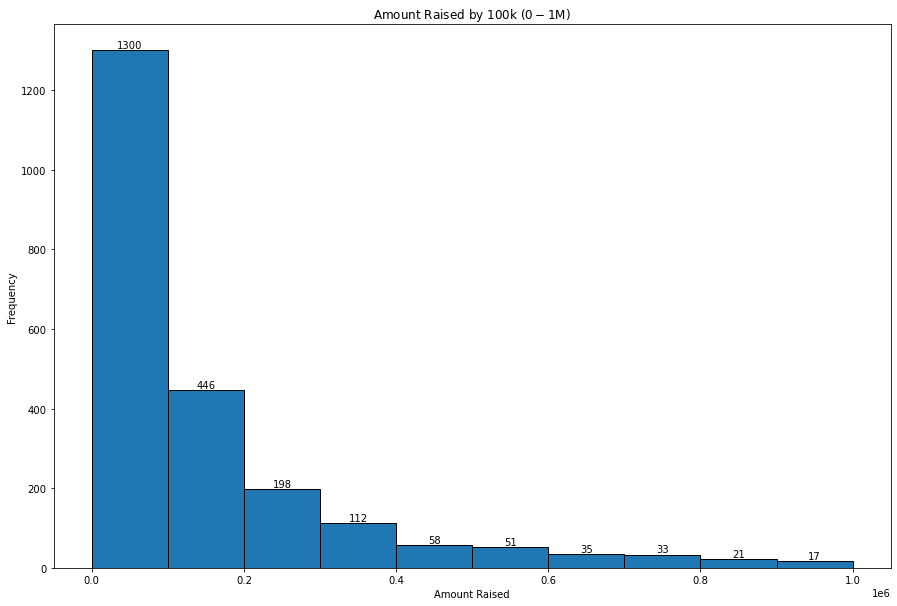

In [41]:
# generate histogram
fig, ax= plt.subplots(figsize=(15,10))
# a histogram returns 3 objects : n (i.e. frequncies), bins, patches
freq, bins, patches = plt.hist(x=cf['amount raised'], bins= 10, range = (0,1000000), edgecolor = 'black')

# x coordinate for labels
bin_centers = np.diff(bins)*0.5 + bins[:-1]

n = 0
for fr, x, patch in zip(freq, bin_centers, patches):
  height = int(freq[n])
  plt.annotate("{}".format(height),
               xy = (x, height),             # top left corner of the histogram bar
               xytext = (0,0.2),             # offsetting label position above its bar
               textcoords = "offset points", # Offset (in points) from the *xy* value
               ha = 'center', va = 'bottom'
               )
  n = n+1
ax.set_xlabel('Amount Raised')
ax.set_ylabel('Frequency')
ax.set_title('Amount Raised by 100k ($0-$1M)')
plt.show;

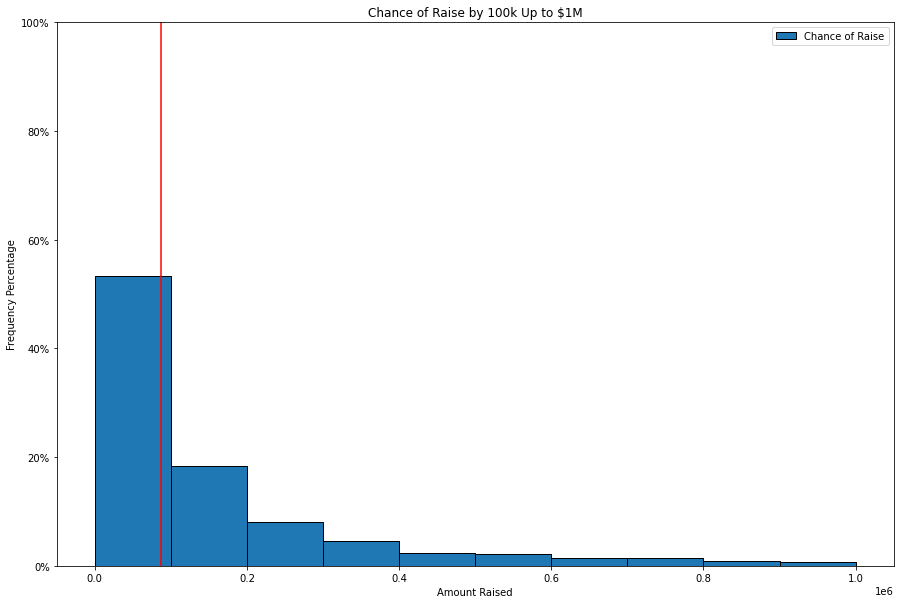

In [42]:
data = cf['amount raised']
fig, ax= plt.subplots(figsize=(15,10))
plt.hist(data, weights=np.ones(len(data)) / len(data), bins=10, range= (0,1000000), edgecolor= "black", label= 'Chance of Raise')
ax.set_ylim(0,1)
plt.axvline(x=cf['amount raised'].median(), color='red')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
ax.set_xlabel('Amount Raised')
ax.set_ylabel('Frequency Percentage')
ax.set_title('Chance of Raise by 100k Up to $1M')
plt.legend()
plt.show()

 Issuers have less than a 50% chance of raising more than 100k and less than 30% chance of raising more than 200k.

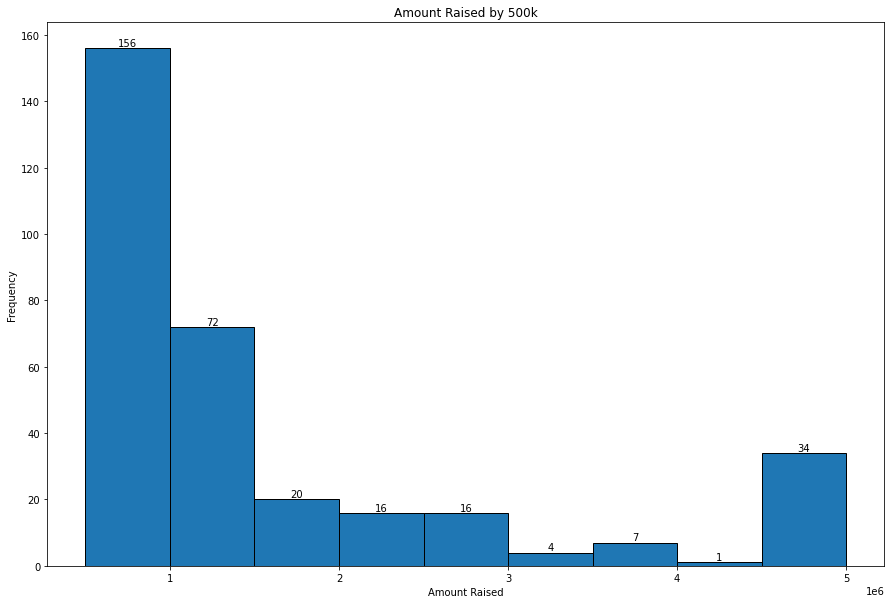

In [43]:
# generate histogram
fig, ax= plt.subplots(figsize=(15,10))
# a histogram returns 3 objects : n (i.e. frequncies), bins, patches
freq, bins, patches = plt.hist(x=cf['amount raised'], bins= 9, range = (500000,5000000), edgecolor = 'black')

# x coordinate for labels
bin_centers = np.diff(bins)*0.5 + bins[:-1]

n = 0
for fr, x, patch in zip(freq, bin_centers, patches):
  height = int(freq[n])
  plt.annotate("{}".format(height),
               xy = (x, height),             # top left corner of the histogram bar
               xytext = (0,0.2),             # offsetting label position above its bar
               textcoords = "offset points", # Offset (in points) from the *xy* value
               ha = 'center', va = 'bottom'
               )
  n = n+1
ax.set_xlabel('Amount Raised')
ax.set_ylabel('Frequency')
ax.set_title('Amount Raised by 500k')
plt.show;

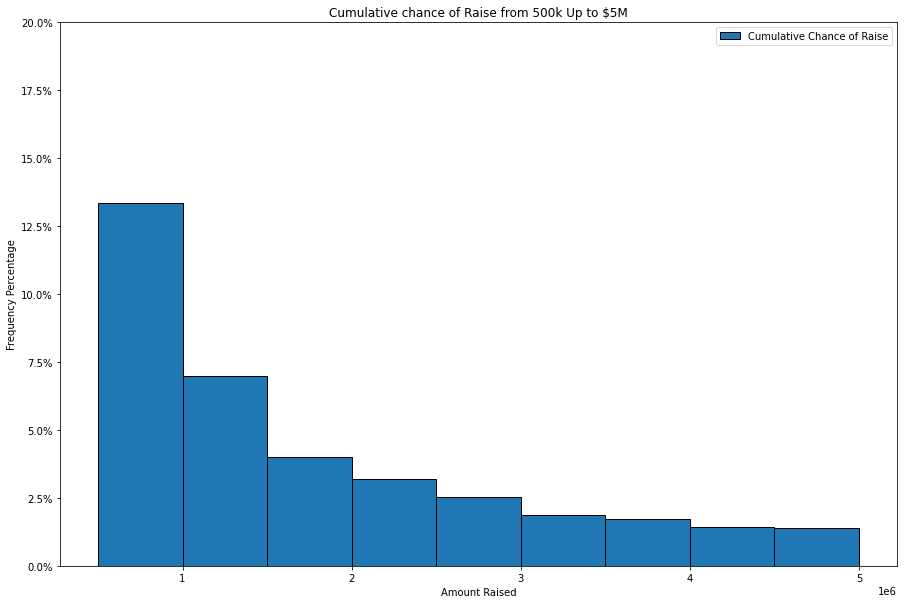

In [44]:
data = cf['amount raised']
fig, ax= plt.subplots(figsize=(15,10))
plt.hist(data, weights=np.ones(len(data)) / len(data), bins=9, range= (500000,5000000), edgecolor= "black", label= 'Cumulative Chance of Raise', cumulative=-1)
ax.set_ylim(0,.20)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
ax.set_xlabel('Amount Raised')
ax.set_ylabel('Frequency Percentage')
ax.set_title('Cumulative chance of Raise from 500k Up to $5M')
plt.legend()
plt.show()

With success rates relatively low, lets analyze other data to see what gives us the best chance for success.  

In [45]:
#creating new success column
cf['success']= np.where(cf['amount raised']<= 500000, False, True)
cf['success']= cf['success'].astype(int)
cf.head()

company  status                                industry  \
0              Wunderkeks  Active           Food, Beverage, & Restaurants   
1                VitalFlo  Active            Healthcare & Pharmaceuticals   
2        Uncle Ed’s Vodka  Active  Alcohol, Tobacco, & Recreational Drugs   
3       Philosopher Foods  Active           Food, Beverage, & Restaurants   
4  Swiss Precision Active  Active            Healthcare & Pharmaceuticals   

      platform  Valuation / Cap     security type momentum  amount raised  \
0     Wefunder         20000000              SAFE     Cool          38818   
1     Wefunder          7000000              SAFE     Warm         235356   
2     Wefunder         25000000              SAFE     Cold         117367   
3     Wefunder          6400000  Convertible Note     Cold          81311   
4  StartEngine         12000000   Equity - Common     Cold          47449   

  start date close date  annual revenue  revenue multiple  investors  \
0 2022-11-01 2023-04-30         4943466               4.0          0   
1 2022-11-01 2023-04-30           72690              96.3         94   
2 2022-11-01 2023-04-30          315603              79.2         16   
3 2022-11-01 2023-04-30          831044               7.7         53   
4 2022-11-01 2023-03-02            5850            1000.0         88   

   average daily raise  min investment reg type  minority founders  \
0                  413             100    RegCF               True   
1                 2504             250    RegCF              False   
2                 1249             100    RegCF              False   
3                  865             100    RegCF              False   
4                  505             200    RegCF               True   

   Women Founders  social impact  success  
0           False          False        0  
1           False          False        0  
2           False          False        0  
3           False           True        0  
4           False          False        0

In [46]:
#checking types- success needs to be boolean
cf.dtypes

company                        object
status                         object
industry                       object
platform                       object
Valuation / Cap                 int32
security type                  object
momentum                       object
amount raised                   int32
start date             datetime64[ns]
close date             datetime64[ns]
annual revenue                  int32
revenue multiple              float64
investors                       int32
average daily raise             int32
min investment                  int32
reg type                       object
minority founders                bool
Women Founders                   bool
social impact                    bool
success                         int32
dtype: object

In [47]:
cf['success'] = cf['success'].astype(bool)

In [48]:
cf

company      status  \
0                      Wunderkeks      Active   
1                        VitalFlo      Active   
2                Uncle Ed’s Vodka      Active   
3               Philosopher Foods      Active   
4          Swiss Precision Active      Active   
...                           ...         ...   
2435             Meadows Italiano  Not Funded   
2436               KSITY Pizzeria  Not Funded   
2437                      Hideout  Not Funded   
2438  Planted Recovery Telehealth  Not Funded   
2439                  Roast Umber  Not Funded   

                                    industry     platform  Valuation / Cap  \
0              Food, Beverage, & Restaurants     Wefunder         20000000   
1               Healthcare & Pharmaceuticals     Wefunder          7000000   
2     Alcohol, Tobacco, & Recreational Drugs     Wefunder         25000000   
3              Food, Beverage, & Restaurants     Wefunder          6400000   
4               Healthcare & Pharmaceuticals  StartEngine         12000000   
...                                      ...          ...              ...   
2435           Food, Beverage, & Restaurants     MainVest                0   
2436           Food, Beverage, & Restaurants     MainVest                0   
2437           Food, Beverage, & Restaurants     Wefunder          9000000   
2438                      Fitness & Wellness     Wefunder          5000000   
2439           Food, Beverage, & Restaurants     MainVest                0   

         security type momentum  amount raised start date close date  \
0                 SAFE     Cool          38818 2022-11-01 2023-04-30   
1                 SAFE     Warm         235356 2022-11-01 2023-04-30   
2                 SAFE     Cold         117367 2022-11-01 2023-04-30   
3     Convertible Note     Cold          81311 2022-11-01 2023-04-30   
4      Equity - Common     Cold          47449 2022-11-01 2023-03-02   
...                ...      ...            ...        ...        ...   
2435     Revenue Share   Closed          10600 2021-03-18 2021-05-26   
2436     Revenue Share   Closed           4900 2021-03-18 2021-05-03   
2437              SAFE   Closed         202950 2021-03-16 2021-03-31   
2438  Convertible Note   Closed          30100 2021-03-15 2021-09-02   
2439     Revenue Share   Closed          26200 2021-03-15 2022-01-14   

      annual revenue  revenue multiple  investors  average daily raise  \
0            4943466               4.0          0                  413   
1              72690              96.3         94                 2504   
2             315603              79.2         16                 1249   
3             831044               7.7         53                  865   
4               5850            1000.0         88                  505   
...              ...               ...        ...                  ...   
2435               0               0.0         22                  154   
2436               0               0.0          3                  107   
2437          317176              28.4          0                13530   
2438               0               0.0         10                  176   
2439           31304               0.0         58                   86   

      min investment reg type  minority founders  Women Founders  \
0                100    RegCF               True           False   
1                250    RegCF              False           False   
2                100    RegCF              False           False   
3                100    RegCF              False           False   
4                200    RegCF               True           False   
...              ...      ...                ...             ...   
2435             100    RegCF              False           False   
2436             100    RegCF              False            True   
2437             100    RegCF               True           False   
2438             100    RegCF              False           False  

#### Minimum Investment

In [49]:
cf.dtypes

company                        object
status                         object
industry                       object
platform                       object
Valuation / Cap                 int32
security type                  object
momentum                       object
amount raised                   int32
start date             datetime64[ns]
close date             datetime64[ns]
annual revenue                  int32
revenue multiple              float64
investors                       int32
average daily raise             int32
min investment                  int32
reg type                       object
minority founders                bool
Women Founders                   bool
social impact                    bool
success                          bool
dtype: object

In [50]:
#checking value counts
cf['min investment'].value_counts()

100     1308
250      236
500      100
1000      89
150       86
        ... 
147        1
171        1
195        1
201        1
600        1
Name: min investment, Length: 174, dtype: int64

In [51]:
# min invest frequency above 35 to reduce randomness
cf['min investment'].value_counts().loc[lambda x: x>35]

100     1308
250      236
500      100
1000      89
150       86
10        71
99        64
200       52
300       40
249       36
Name: min investment, dtype: int64

Over half of the minimum investments are 100.

In [52]:
#creating and agg function
agg_func = {
    'amount raised':
    ['describe']
}

In [53]:
#creating df only with rows of min amounts with above 35 count
minin = cf[cf.groupby('min investment')['min investment'].transform('count')>35].copy()
minin

company      status  \
0                      Wunderkeks      Active   
1                        VitalFlo      Active   
2                Uncle Ed’s Vodka      Active   
3               Philosopher Foods      Active   
4          Swiss Precision Active      Active   
...                           ...         ...   
2435             Meadows Italiano  Not Funded   
2436               KSITY Pizzeria  Not Funded   
2437                      Hideout  Not Funded   
2438  Planted Recovery Telehealth  Not Funded   
2439                  Roast Umber  Not Funded   

                                    industry     platform  Valuation / Cap  \
0              Food, Beverage, & Restaurants     Wefunder         20000000   
1               Healthcare & Pharmaceuticals     Wefunder          7000000   
2     Alcohol, Tobacco, & Recreational Drugs     Wefunder         25000000   
3              Food, Beverage, & Restaurants     Wefunder          6400000   
4               Healthcare & Pharmaceuticals  StartEngine         12000000   
...                                      ...          ...              ...   
2435           Food, Beverage, & Restaurants     MainVest                0   
2436           Food, Beverage, & Restaurants     MainVest                0   
2437           Food, Beverage, & Restaurants     Wefunder          9000000   
2438                      Fitness & Wellness     Wefunder          5000000   
2439           Food, Beverage, & Restaurants     MainVest                0   

         security type momentum  amount raised start date close date  \
0                 SAFE     Cool          38818 2022-11-01 2023-04-30   
1                 SAFE     Warm         235356 2022-11-01 2023-04-30   
2                 SAFE     Cold         117367 2022-11-01 2023-04-30   
3     Convertible Note     Cold          81311 2022-11-01 2023-04-30   
4      Equity - Common     Cold          47449 2022-11-01 2023-03-02   
...                ...      ...            ...        ...        ...   
2435     Revenue Share   Closed          10600 2021-03-18 2021-05-26   
2436     Revenue Share   Closed           4900 2021-03-18 2021-05-03   
2437              SAFE   Closed         202950 2021-03-16 2021-03-31   
2438  Convertible Note   Closed          30100 2021-03-15 2021-09-02   
2439     Revenue Share   Closed          26200 2021-03-15 2022-01-14   

      annual revenue  revenue multiple  investors  average daily raise  \
0            4943466               4.0          0                  413   
1              72690              96.3         94                 2504   
2             315603              79.2         16                 1249   
3             831044               7.7         53                  865   
4               5850            1000.0         88                  505   
...              ...               ...        ...                  ...   
2435               0               0.0         22                  154   
2436               0               0.0          3                  107   
2437          317176              28.4          0                13530   
2438               0               0.0         10                  176   
2439           31304               0.0         58                   86   

      min investment reg type  minority founders  Women Founders  \
0                100    RegCF               True           False   
1                250    RegCF              False           False   
2                100    RegCF              False           False   
3                100    RegCF              False           False   
4                200    RegCF               True           False   
...              ...      ...                ...             ...   
2435             100    RegCF              False           False   
2436             100    RegCF              False            True   
2437             100    RegCF               True           False   
2438             100    RegCF              False           False  

In [54]:
#checking key stats for minimum investment
minstats=minin.groupby(['min investment']).agg(agg_func)
minstats

amount raised                                              \
                    describe                                               
                       count           mean           std  min       25%   
min investment                                                             
10                      71.0  109572.323944  1.856635e+05  0.0  41040.00   
99                      64.0   77928.515625  1.413392e+05  0.0  10082.25   
100                   1308.0  252098.331804  6.766833e+05  0.0  25150.25   
150                     86.0  260950.488372  5.185281e+05  0.0  42835.00   
200                     52.0  249467.230769  3.298973e+05  0.0  48187.00   
249                     36.0  372437.111111  6.349097e+05  0.0  40666.75   
250                    236.0  453527.563559  7.995649e+05  0.0  52246.75   
300                     40.0  180435.350000  2.927394e+05  0.0  26980.25   
500                    100.0  532662.990000  1.185129e+06  0.0  55935.25   
1000                    89.0  419488.247191  9.378755e+05  0.0  12000.00   

                                                
                                                
                     50%        75%        max  
min investment                                  
10               66990.0  109805.00  1433500.0  
99               33599.5   63828.50   710266.0  
100              70000.5  178122.50  5000000.0  
150             111443.5  220961.75  3000000.0  
200             122266.5  315181.75  1677894.0  
249             105790.5  382003.75  3357879.0  
250             149100.5  477272.00  5000000.0  
300              88857.0  188281.75  1427678.0  
500             144624.5  309268.75  5000000.0  
1000            118945.0  364000.00  5000000.0

In [55]:
#sorting min investment amount by highest mean amount raised
meanmiar= minin.groupby('min investment')['amount raised'].mean()
meanmiar1=meanmiar.to_frame().sort_values(by= 'amount raised', ascending=False)
meanmiar1

amount raised
min investment               
500             532662.990000
250             453527.563559
1000            419488.247191
249             372437.111111
150             260950.488372
100             252098.331804
200             249467.230769
300             180435.350000
10              109572.323944
99               77928.515625

In [56]:
#sorting min investment about by highest median amount raised
medmiar= minin.groupby('min investment')['amount raised'].median()
medmiar.to_frame().sort_values(by= 'amount raised', ascending=False)

amount raised
min investment               
250                  149100.5
500                  144624.5
200                  122266.5
1000                 118945.0
150                  111443.5
249                  105790.5
300                   88857.0
100                   70000.5
10                    66990.0
99                    33599.5

250 minimum investment has the highest median amount raised and 500 has the highest mean amount raised.

In [57]:
#check for correlation between investment size and amount raised
cf['min investment'].corr(cf['amount raised'])

0.06580335597728446

In [58]:
mi=minin.groupby(['min investment'])['success'].value_counts().unstack()
mi

success         False  True 
min investment              
10                 69      2
99                 61      3
100              1184    124
150                77      9
200                42     10
249                27      9
250               178     58
300                37      3
500                81     19
1000               71     18

In [59]:
#sorting values
mipct= mi.divide(mi.sum(axis=1), axis=0)
mipct[1].to_frame().sort_values(by=[1],ascending=False)

True
min investment          
249             0.250000
250             0.245763
1000            0.202247
200             0.192308
500             0.190000
150             0.104651
100             0.094801
300             0.075000
99              0.046875
10              0.028169

The average success rate is 13%, however minimum investment amounts of 249 and 250 are almost double that!  Over half of the investments have minimums of 100 yet the sucess rates are far below average.  Even though 500 min investment had the highest average amount raised, only 19% of offerings are considered successful. 250 has the highest median mount raised and almost the highest success rate.  Correlation of amount raised and min investment is minimal.

(0.0, 1100.0)

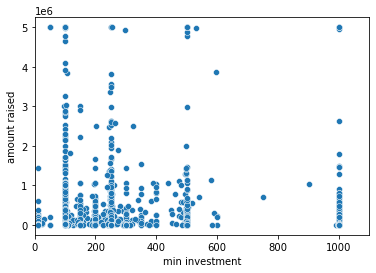

In [60]:
#checking for pattern
ax=sns.scatterplot(data=cf, x='min investment', y='amount raised')
plt.xlim(0,1100)

### Industry

The industry a company is in can have a significant impact on success rates for issuers. Lets see what the public has the biggest demand for.

In [61]:
#see the participating industries and check their prevalance 
cf['industry'].value_counts()

Food, Beverage, & Restaurants                        488
Media, Entertainment & Publishing                    250
Business Services, Software, & Applications          240
Healthcare & Pharmaceuticals                         216
Consumer Products, Goods & Services                  178
Alcohol, Tobacco, & Recreational Drugs               175
Financial & Insurance Products & Services            136
Transportation, Automotive, Aviation, & Aerospace    120
Energy, Power, & Natural Resources                   111
Real Estate & Construction                           100
Fitness & Wellness                                    83
Education, Training, & Coaching                       44
Apparel & Fashion                                     44
Beauty & Personal Care                                39
Logistics, Delivery, & Supply Chain                   37
Security, Cybersecurity, & Defense                    34
Marketing & Advertising                               33
Travel and Hospitality         

In [62]:
#checking stats on each industry
cf.groupby(['industry']).agg(agg_func)

amount raised  \
                                                       describe   
                                                          count   
industry                                                          
Alcohol, Tobacco, & Recreational Drugs                    175.0   
Apparel & Fashion                                          44.0   
Arts & Crafts                                               5.0   
Beauty & Personal Care                                     39.0   
Business Services, Software, & Applications               240.0   
Consumer Products, Goods & Services                       178.0   
Education, Training, & Coaching                            44.0   
Energy, Power, & Natural Resources                        111.0   
Farming & Agriculture                                      27.0   
Financial & Insurance Products & Services                 136.0   
Fitness & Wellness                                         83.0   
Food, Beverage, & Restaurants                             488.0   
Healthcare & Pharmaceuticals                              216.0   
Industrial Services                                        22.0   
Logistics, Delivery, & Supply Chain                        37.0   
Marketing & Advertising                                    33.0   
Media, Entertainment & Publishing                         250.0   
Pet Health, Food, and Services                             14.0   
Real Estate & Construction                                100.0   
Retail Shops & Department Stores                           15.0   
Security, Cybersecurity, & Defense                         34.0   
Transportation, Automotive, Aviation, & Aerospace         120.0   
Travel and Hospitality                                     29.0   

                                                                  \
                                                                   
                                                            mean   
industry                                                           
Alcohol, Tobacco, & Recreational Drugs             200957.720000   
Apparel & Fashion                                  153784.681818   
Arts & Crafts                                      114413.000000   
Beauty & Personal Care                             170150.794872   
Business Services, Software, & Applications        335022.008333   
Consumer Products, Goods & Services                236427.865169   
Education, Training, & Coaching                    281813.340909   
Energy, Power, & Natural Resources                 566495.693694   
Farming & Agriculture                              434332.888889   
Financial & Insurance Products & Services          572623.213235   
Fitness & Wellness                                 241072.084337   
Food, Beverage, & Restaurants                      164180.637295   
Healthcare & Pharmaceuticals                       331375.250000   
Industrial Services                                422275.727273   
Logistics, Delivery, & Supply Chain                170938.621622   
Marketing & Advertising                            430414.090909   
Media, Entertainment & Publishing                  229317.596000   
Pet Health, Food, and Services                     110386.928571   
Real Estate & Construction                         588752.120000   
Retail Shops & Department Stores                    54011.800000   
Security, Cybersecurity, & Defense                 512071.205882   
Transportation, Automotive, Aviation, & Aerospace  509622.350000   
Travel and Hospitality                             178260.379310   

                                                                          \
                                                                           
                                                            std      min   
industry                                                                   
Alcohol, Tobacco, & Recreational Drugs             3.204223e+05      0.0   
Apparel & Fashion      

In [63]:
#show mean ranked by industry
iar=cf.groupby('industry')['amount raised'].mean()
iar.to_frame().sort_values(by='amount raised',ascending=False)

amount raised
industry                                                        
Real Estate & Construction                         588752.120000
Financial & Insurance Products & Services          572623.213235
Energy, Power, & Natural Resources                 566495.693694
Security, Cybersecurity, & Defense                 512071.205882
Transportation, Automotive, Aviation, & Aerospace  509622.350000
Farming & Agriculture                              434332.888889
Marketing & Advertising                            430414.090909
Industrial Services                                422275.727273
Business Services, Software, & Applications        335022.008333
Healthcare & Pharmaceuticals                       331375.250000
Education, Training, & Coaching                    281813.340909
Fitness & Wellness                                 241072.084337
Consumer Products, Goods & Services                236427.865169
Media, Entertainment & Publishing                  229317.596000
Alcohol, Tobacco, & Recreational Drugs             200957.720000
Travel and Hospitality                             178260.379310
Logistics, Delivery, & Supply Chain                170938.621622
Beauty & Personal Care                             170150.794872
Food, Beverage, & Restaurants                      164180.637295
Apparel & Fashion                                  153784.681818
Arts & Crafts                                      114413.000000
Pet Health, Food, and Services                     110386.928571
Retail Shops & Department Stores                    54011.800000

<AxesSubplot:ylabel='industry'>

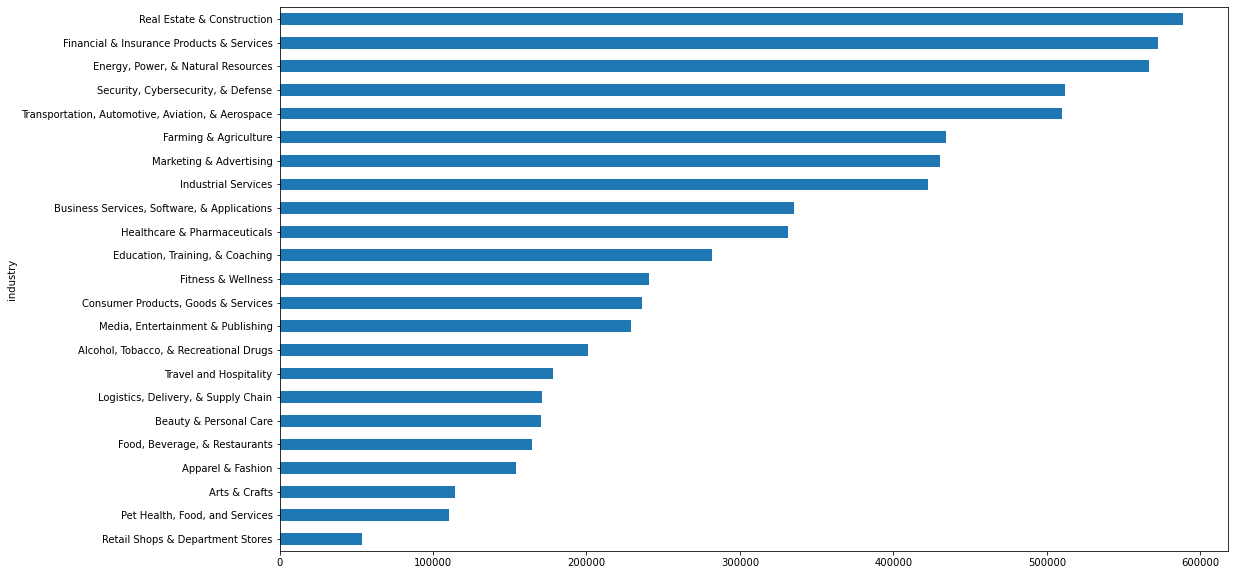

In [64]:
#visualizing average amount raised by industry
iar.sort_values(ascending=True).plot.barh(x='industry', figsize=(17,10))

In [65]:
#show mean ranked by industry
mediar=cf.groupby('industry')['amount raised'].median()
mediar.to_frame().sort_values(by='amount raised',ascending=False)

amount raised
industry                                                        
Energy, Power, & Natural Resources                      247519.0
Transportation, Automotive, Aviation, & Aerospace       195784.5
Financial & Insurance Products & Services               169487.0
Real Estate & Construction                              164011.0
Industrial Services                                     132321.5
Farming & Agriculture                                   127100.0
Apparel & Fashion                                       108573.0
Healthcare & Pharmaceuticals                            101676.0
Fitness & Wellness                                       96400.0
Marketing & Advertising                                  89850.0
Logistics, Delivery, & Supply Chain                      88678.0
Security, Cybersecurity, & Defense                       84460.0
Travel and Hospitality                                   83999.0
Alcohol, Tobacco, & Recreational Drugs                   82560.0
Education, Training, & Coaching                          82433.0
Business Services, Software, & Applications              76340.5
Media, Entertainment & Publishing                        74568.5
Consumer Products, Goods & Services                      62025.0
Arts & Crafts                                            55650.0
Food, Beverage, & Restaurants                            54625.0
Beauty & Personal Care                                   45500.0
Pet Health, Food, and Services                           38458.0
Retail Shops & Department Stores                         32300.0

<AxesSubplot:ylabel='industry'>

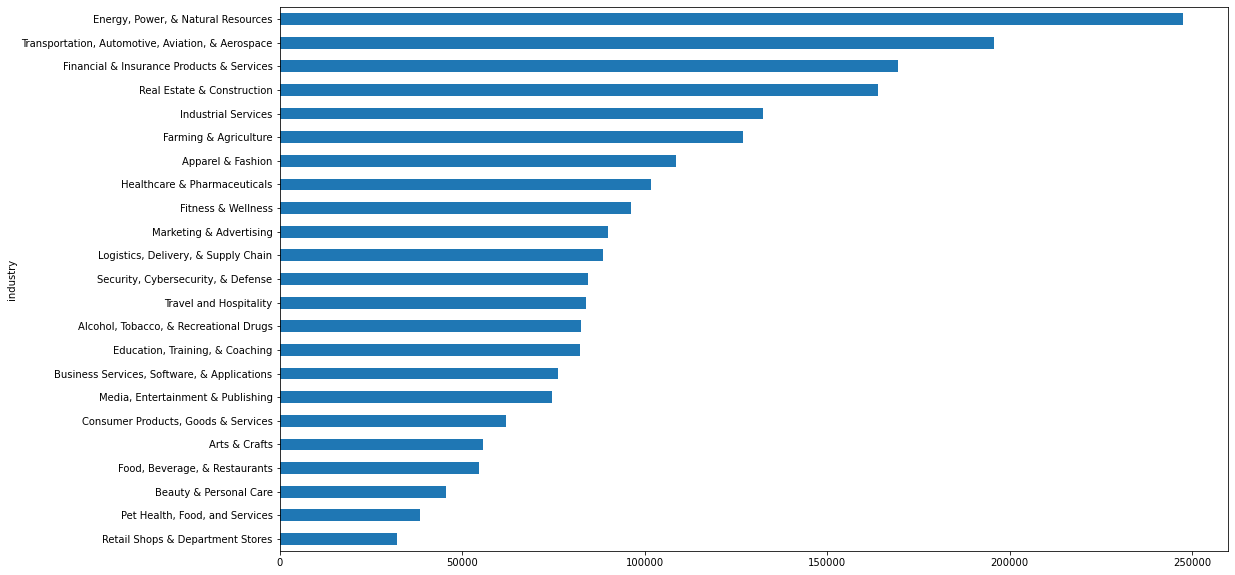

In [66]:
#visualizing median amount raised by industry
mediar.sort_values(ascending=True).plot.barh(x='industry', figsize=(17,10))

In [67]:
#measuring success
ins=cf.groupby(['industry'])['success'].value_counts().unstack()
ins

success                                            False  True 
industry                                                       
Alcohol, Tobacco, & Recreational Drugs             153.0   22.0
Apparel & Fashion                                   42.0    2.0
Arts & Crafts                                        5.0    NaN
Beauty & Personal Care                              37.0    2.0
Business Services, Software, & Applications        216.0   24.0
Consumer Products, Goods & Services                159.0   19.0
Education, Training, & Coaching                     38.0    6.0
Energy, Power, & Natural Resources                  73.0   38.0
Farming & Agriculture                               21.0    6.0
Financial & Insurance Products & Services           98.0   38.0
Fitness & Wellness                                  74.0    9.0
Food, Beverage, & Restaurants                      462.0   26.0
Healthcare & Pharmaceuticals                       186.0   30.0
Industrial Services                                 16.0    6.0
Logistics, Delivery, & Supply Chain                 35.0    2.0
Marketing & Advertising                             30.0    3.0
Media, Entertainment & Publishing                  224.0   26.0
Pet Health, Food, and Services                      13.0    1.0
Real Estate & Construction                          74.0   26.0
Retail Shops & Department Stores                    15.0    NaN
Security, Cybersecurity, & Defense                  29.0    5.0
Transportation, Automotive, Aviation, & Aerospace   90.0   30.0
Travel and Hospitality                              27.0    2.0

In [68]:
#sorting values as a percentage
inspct= ins.divide(ins.sum(axis=1), axis=0)
inspct[1].to_frame().sort_values(by=[1],ascending=False)

True
industry                                                   
Energy, Power, & Natural Resources                 0.342342
Financial & Insurance Products & Services          0.279412
Industrial Services                                0.272727
Real Estate & Construction                         0.260000
Transportation, Automotive, Aviation, & Aerospace  0.250000
Farming & Agriculture                              0.222222
Security, Cybersecurity, & Defense                 0.147059
Healthcare & Pharmaceuticals                       0.138889
Education, Training, & Coaching                    0.136364
Alcohol, Tobacco, & Recreational Drugs             0.125714
Fitness & Wellness                                 0.108434
Consumer Products, Goods & Services                0.106742
Media, Entertainment & Publishing                  0.104000
Business Services, Software, & Applications        0.100000
Marketing & Advertising                            0.090909
Pet Health, Food, and Services                     0.071429
Travel and Hospitality                             0.068966
Logistics, Delivery, & Supply Chain                0.054054
Food, Beverage, & Restaurants                      0.053279
Beauty & Personal Care                             0.051282
Apparel & Fashion                                  0.045455
Arts & Crafts                                           NaN
Retail Shops & Department Stores                        NaN

Energy, Power, and Natural Resources industry has a much higher success rate from the rest of the field, almost 3 times the average success rate and also has by far the highest median raise, also three times the average across industries.  Real Estate and Construction have the highest average raise but success rates and median raise number are a few places from the top.  Food, Beverage, and Media industry lead the pack in count, almost doubling the next highest industry in attempts, yet remains near the bottom in success rate, median, and average raises.

### Platform

The analysis here will be two fold, we will explore which platform is the best performing but also compare how Reg CF offerings compare on funding portals vs non funding portals or independents.

In [69]:
#checking value counts for each platform
cf['platform'].value_counts()

Wefunder                  734
StartEngine               537
MainVest                  278
Republic                  251
Honeycomb                 136
Netcapital                125
SMBX                       77
SeedInvest                 47
Silicon Prairie Online     25
Microventures              22
Fundify                    17
Small Change               16
Raise Green                16
PicMii                     15
Rialto Markets             14
Dalmore Group              13
Mr. Crowd                  12
TruCrowd                   12
Seed At The Table           9
Dealmaker Securities        9
Vicinity                    8
Infrashares                 7
Spaced Ventures             6
Castle Placement            6
Fundanna                    6
NextSeed                    6
Equifund CFP                5
Title3Funds                 5
WunderFund                  5
Ignite Social Impact        4
Localstake                  4
Fundme                      3
TycoonInvest                3
ALAO Inves

In [70]:
#sorting out independent raises
#securitize is independent but was not included due to inaccurate amount raised data
independent= cf[(cf['platform']== "Rialto Markets") | (cf['platform']== "Dalmore Group") | (cf['platform']=='Fundopolis')]
independent


company      status  \
56                       Popwheels      Active   
129                       Ouragins      Active   
193                   LiquidMining      Active   
203            Roxi Fantasy Gaming      Active   
220         Coin and Card Auctions      Active   
221                     PieBooking      Active   
227        Iron Mountain Challenge      Active   
233   No Limit Technology Holdings      Active   
512            Fist Assist Devices      Funded   
564             Amphitrite Digital      Funded   
681                  Victor Energy      Funded   
700         Synergy Health Network      Funded   
785                        CalTier      Funded   
953                       Ouragins      Funded   
993                      Irrigreen      Funded   
1231             Grow Space Orange      Funded   
1283                      SupChina      Funded   
1313                           PvP      Funded   
1394        SafeRX Pharmaceuticals      Funded   
1396                       Vinsent      Funded   
1450              Janover Ventures      Funded   
1503          Atlis Motor Vehicles      Funded   
1530                   Trust Stamp      Funded   
1677                    Cayo Films      Funded   
1688                   Glytch Gear      Funded   
2209                  M.C. Squares  Not Funded   
2213                    SoberBuddy  Not Funded   
2293                       Rockval  Not Funded   

                                               industry        platform  \
56                   Energy, Power, & Natural Resources  Rialto Markets   
129                                   Apparel & Fashion  Rialto Markets   
193           Financial & Insurance Products & Services  Rialto Markets   
203                   Media, Entertainment & Publishing  Rialto Markets   
220         Business Services, Software, & Applications   Dalmore Group   
221         Business Services, Software, & Applications   Dalmore Group   
227                                  Fitness & Wellness  Rialto Markets   
233                   Media, Entertainment & Publishing  Rialto Markets   
512                        Healthcare & Pharmaceuticals  Rialto Markets   
564                              Travel and Hospitality  Rialto Markets   
681                  Energy, Power, & Natural Resources  Rialto Markets   
700                        Healthcare & Pharmaceuticals  Rialto Markets   
785           Financial & Insurance Products & Services  Rialto Markets   
953                                   Apparel & Fashion  Rialto Markets   
993                 Consumer Products, Goods & Services   Dalmore Group   
1231                         Real Estate & Construction  Rialto Markets   
1283                  Media, Entertainment & Publishing   Dalmore Group   
1313                Consumer Products, Goods & Services   Dalmore Group   
1394                       Healthcare & Pharmaceuticals   Dalmore Group   
1396             Alcohol, Tobacco, & Recreational Drugs   Dalmore Group   
1450                         Real Estate & Construction   Dalmore Group   
1503  Transportation, Automotive, Aviation, & Aerospace  Rialto Markets   
1530                 Security, Cybersecurity, & Defense   Dalmore Group   
1677                  Media, Entertainment & Publishing   Dalmore Group   
1688                  Media, Entertainment & Publishing   Dalmore Group   
2209                Consumer Products, Goods & Services   Dalmore Group   
2213                                 Fitness & Wellness   Dalmore Group   
2293                         Real Estate & Construction      Fundopolis   

      Valuation / Cap       security type momentum  amount raised start date  \
56           17100000  Equity - Preferred        0              0 2022-10-07   
129          18935379     Equity - Common     Cold              0 2022-08-29   
193          50000000    Convertible Note        0              0 2022-06-27   
203           8569995     Equity - Common     Cold              0 2022-06-13   


In [71]:
#independent amount raised vs overall
print(independent['amount raised'].mean())
print(independent['amount raised'].median())

620213.2142857143
26322.0


Although the sample size is extremely small, it seems like raising independently is a viable alternative to crowdfunding platforms as the average raise is over twice as high but the median raise is significantly lower.  Seems to be a case of higher ceiling and lower floor.

Lets remove counts below 10 to get the best statistical significance and analyze all the platforms together.

In [72]:
#creating df only with rows of min amounts with above 35 count
platform = cf[cf.groupby('platform')['platform'].transform('count')>10].copy()
platform

company      status  \
0                      Wunderkeks      Active   
1                        VitalFlo      Active   
2                Uncle Ed’s Vodka      Active   
3               Philosopher Foods      Active   
4          Swiss Precision Active      Active   
...                           ...         ...   
2435             Meadows Italiano  Not Funded   
2436               KSITY Pizzeria  Not Funded   
2437                      Hideout  Not Funded   
2438  Planted Recovery Telehealth  Not Funded   
2439                  Roast Umber  Not Funded   

                                    industry     platform  Valuation / Cap  \
0              Food, Beverage, & Restaurants     Wefunder         20000000   
1               Healthcare & Pharmaceuticals     Wefunder          7000000   
2     Alcohol, Tobacco, & Recreational Drugs     Wefunder         25000000   
3              Food, Beverage, & Restaurants     Wefunder          6400000   
4               Healthcare & Pharmaceuticals  StartEngine         12000000   
...                                      ...          ...              ...   
2435           Food, Beverage, & Restaurants     MainVest                0   
2436           Food, Beverage, & Restaurants     MainVest                0   
2437           Food, Beverage, & Restaurants     Wefunder          9000000   
2438                      Fitness & Wellness     Wefunder          5000000   
2439           Food, Beverage, & Restaurants     MainVest                0   

         security type momentum  amount raised start date close date  \
0                 SAFE     Cool          38818 2022-11-01 2023-04-30   
1                 SAFE     Warm         235356 2022-11-01 2023-04-30   
2                 SAFE     Cold         117367 2022-11-01 2023-04-30   
3     Convertible Note     Cold          81311 2022-11-01 2023-04-30   
4      Equity - Common     Cold          47449 2022-11-01 2023-03-02   
...                ...      ...            ...        ...        ...   
2435     Revenue Share   Closed          10600 2021-03-18 2021-05-26   
2436     Revenue Share   Closed           4900 2021-03-18 2021-05-03   
2437              SAFE   Closed         202950 2021-03-16 2021-03-31   
2438  Convertible Note   Closed          30100 2021-03-15 2021-09-02   
2439     Revenue Share   Closed          26200 2021-03-15 2022-01-14   

      annual revenue  revenue multiple  investors  average daily raise  \
0            4943466               4.0          0                  413   
1              72690              96.3         94                 2504   
2             315603              79.2         16                 1249   
3             831044               7.7         53                  865   
4               5850            1000.0         88                  505   
...              ...               ...        ...                  ...   
2435               0               0.0         22                  154   
2436               0               0.0          3                  107   
2437          317176              28.4          0                13530   
2438               0               0.0         10                  176   
2439           31304               0.0         58                   86   

      min investment reg type  minority founders  Women Founders  \
0                100    RegCF               True           False   
1                250    RegCF              False           False   
2                100    RegCF              False           False   
3                100    RegCF              False           False   
4                200    RegCF               True           False   
...              ...      ...                ...             ...   
2435             100    RegCF              False           False   
2436             100    RegCF              False            True   
2437             100    RegCF               True           False   
2438             100    RegCF              False           False  

In [73]:
platform.groupby(['platform']).agg(agg_func)

amount raised                                       \
                            describe                                        
                               count           mean           std     min   
platform                                                                    
Dalmore Group                   13.0  924517.307692  1.487697e+06     0.0   
Fundify                         17.0   37162.058824  4.370134e+04     0.0   
Honeycomb                      136.0   88373.117647  4.434643e+05     0.0   
MainVest                       278.0   55186.151079  9.609684e+04     0.0   
Microventures                   22.0   69258.681818  7.189696e+04  4350.0   
Mr. Crowd                       12.0    9054.583333  2.098189e+04     0.0   
Netcapital                     125.0  184955.176000  6.044690e+05     0.0   
PicMii                          15.0  357483.533333  1.249560e+06     0.0   
Raise Green                     16.0  330540.625000  3.572816e+05     0.0   
Republic                       251.0  530328.780876  1.131957e+06     0.0   
Rialto Markets                  14.0  381892.428571  1.330650e+06     0.0   
SMBX                            77.0  111381.298701  1.777131e+05     0.0   
SeedInvest                      47.0  370029.489362  4.815813e+05     0.0   
Silicon Prairie Online          25.0   65324.000000  1.029557e+05     0.0   
Small Change                    16.0  261087.500000  3.522168e+05     0.0   
StartEngine                    537.0  353143.230912  6.434037e+05     0.0   
TruCrowd                        12.0  397048.583333  9.940312e+05     0.0   
Wefunder                       734.0  367879.463215  7.499803e+05     0.0   

                                                                   
                                                                   
                              25%       50%        75%        max  
platform                                                           
Dalmore Group            62052.00  141396.0  945323.00  5000000.0  
Fundify                   1100.00   21300.0   59575.00   149840.0  
Honeycomb                15287.50   28377.5   53000.00  5000000.0  
MainVest                  7225.00   30000.0   71725.00  1005500.0  
Microventures            22635.75   33906.5  111322.50   224403.0  
Mr. Crowd                    0.00       0.0    3901.25    71300.0  
Netcapital               10301.00   33924.0  105877.00  4775286.0  
PicMii                      92.50   10116.0   73409.50  4871200.0  
Raise Green             110325.00  178700.0  367925.00  1092000.0  
Republic                 62375.00  150562.0  353760.50  5000000.0  
Rialto Markets               0.00       0.0       0.00  4999841.0  
SMBX                     43670.00   75000.0  114850.00  1433500.0  
SeedInvest               28095.00  220868.0  524635.50  2633766.0  
Silicon Prairie Online    2200.00   20500.0   51500.00   379000.0  
Small Change             82375.00  145950.0  262750.00  1454000.0  
StartEngine              49066.00  131500.0  357480.00  4996579.0  
TruCrowd                  3150.00   88916.0  146558.00  3507072.0  
Wefunder                 62161.00  124462.5  308225.75  5000000.0

In [74]:
#show mean ranked by industry
meanpar=platform.groupby('platform')['amount raised'].mean()
meanpar.to_frame().sort_values(by='amount raised',ascending=False).round()

amount raised
platform                             
Dalmore Group                924517.0
Republic                     530329.0
TruCrowd                     397049.0
Rialto Markets               381892.0
SeedInvest                   370029.0
Wefunder                     367879.0
PicMii                       357484.0
StartEngine                  353143.0
Raise Green                  330541.0
Small Change                 261088.0
Netcapital                   184955.0
SMBX                         111381.0
Honeycomb                     88373.0
Microventures                 69259.0
Silicon Prairie Online        65324.0
MainVest                      55186.0
Fundify                       37162.0
Mr. Crowd                      9055.0

<AxesSubplot:ylabel='platform'>

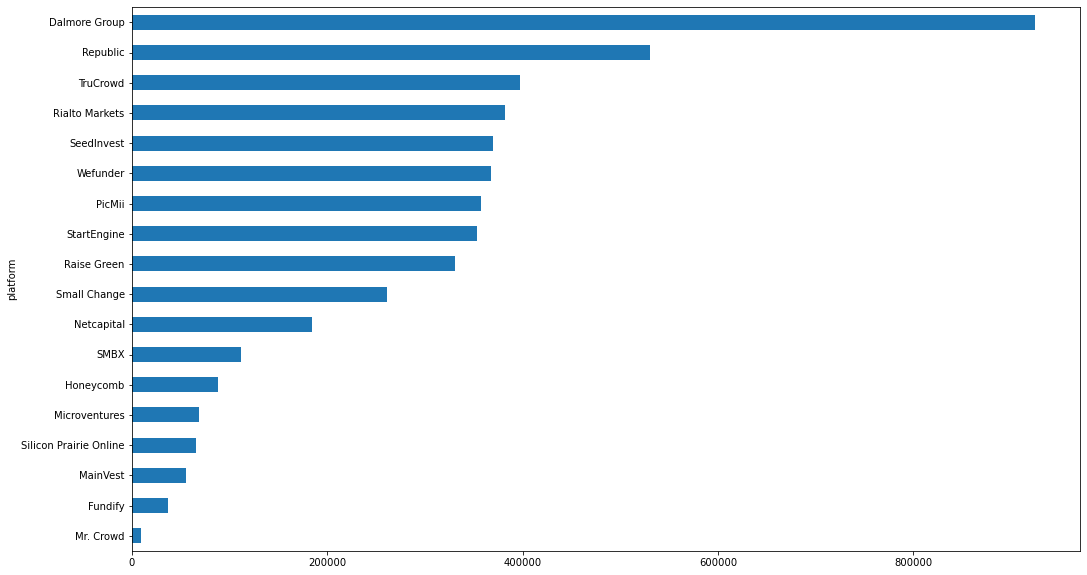

In [75]:
#visualizing average amount raised by industry
meanpar.sort_values(ascending=True).plot.barh(x='platform', figsize=(17,10))

In [76]:
#show median ranked by industry
medpar=platform.groupby('platform')['amount raised'].median()
medpar.to_frame().sort_values(by='amount raised',ascending=False)

amount raised
platform                             
SeedInvest                   220868.0
Raise Green                  178700.0
Republic                     150562.0
Small Change                 145950.0
Dalmore Group                141396.0
StartEngine                  131500.0
Wefunder                     124462.5
TruCrowd                      88916.0
SMBX                          75000.0
Netcapital                    33924.0
Microventures                 33906.5
MainVest                      30000.0
Honeycomb                     28377.5
Fundify                       21300.0
Silicon Prairie Online        20500.0
PicMii                        10116.0
Mr. Crowd                         0.0
Rialto Markets                    0.0

<AxesSubplot:ylabel='platform'>

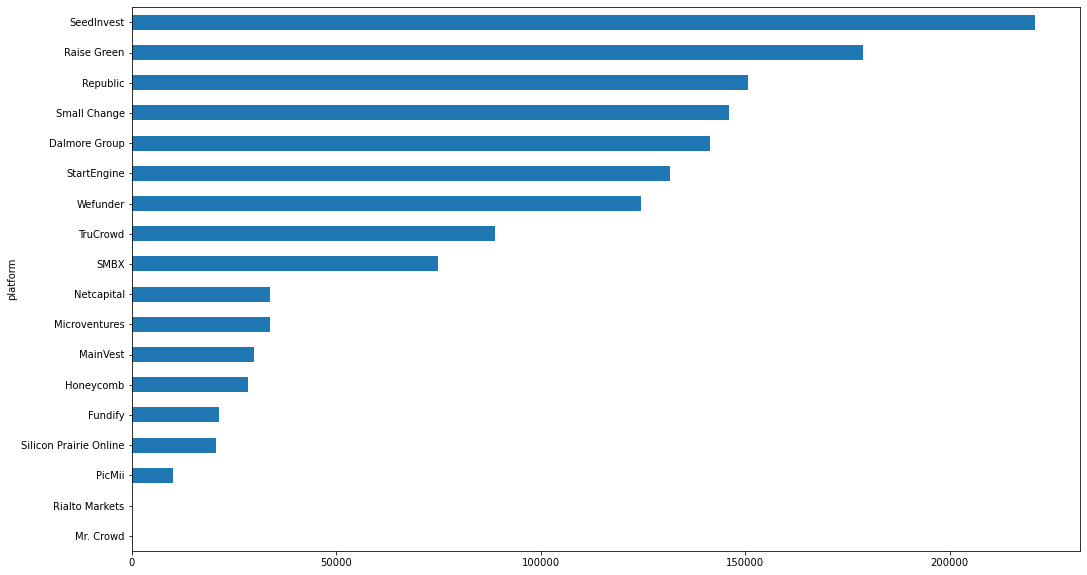

In [77]:
#visualizing average amount raised by industry
medpar.sort_values(ascending=True).plot.barh(x='platform', figsize=(17,10))

In [78]:
plat=platform.groupby(['platform'])['success'].value_counts().unstack()
plat

success                 False  True 
platform                            
Dalmore Group             7.0    6.0
Fundify                  17.0    NaN
Honeycomb               134.0    2.0
MainVest                275.0    3.0
Microventures            22.0    NaN
Mr. Crowd                12.0    NaN
Netcapital              116.0    9.0
PicMii                   14.0    1.0
Raise Green              12.0    4.0
Republic                208.0   43.0
Rialto Markets           13.0    1.0
SMBX                     75.0    2.0
SeedInvest               35.0   12.0
Silicon Prairie Online   25.0    NaN
Small Change             14.0    2.0
StartEngine             434.0  103.0
TruCrowd                 10.0    2.0
Wefunder                612.0  122.0

In [79]:
#sorting values as a percentage
platpct= plat.divide(plat.sum(axis=1), axis=0)
platpct[1].to_frame().sort_values(by=[1],ascending=False)

True
platform                        
Dalmore Group           0.461538
SeedInvest              0.255319
Raise Green             0.250000
StartEngine             0.191806
Republic                0.171315
TruCrowd                0.166667
Wefunder                0.166213
Small Change            0.125000
Netcapital              0.072000
Rialto Markets          0.071429
PicMii                  0.066667
SMBX                    0.025974
Honeycomb               0.014706
MainVest                0.010791
Fundify                      NaN
Microventures                NaN
Mr. Crowd                    NaN
Silicon Prairie Online       NaN

Dalmore Group has the highest mean raise by a wide margin which is significant because raises are conducted through them independently.  SeedInvest is the strongest fundraising platforms offering the safest floor.  Wefunder, Start Engine, and Republic have the most offerings on their platform.

## Valuation/ Cap

We will explore if there is a correlation between valuation and amount raised.

In [80]:
#describing data
cf['Valuation / Cap'].describe()

count    2.440000e+03
mean     1.759545e+07
std      6.715672e+07
min     -2.147484e+09
25%      2.875000e+05
50%      9.000000e+06
75%      1.998209e+07
max      1.620000e+09
Name: Valuation / Cap, dtype: float64

There should not be any negative value.  Lets drop all rows with valuations below 0. As well as rows above a 750 million as this is an unlikely valuation for any company doing this kind of raise.

In [81]:
#removing valuations below 0
cf= cf[cf['Valuation / Cap']>=0]
cf= cf[cf['Valuation / Cap']< 750000000]

In [82]:
#checking if below 0 values were dropped
cf['Valuation / Cap'].describe()

count    2.437000e+03
mean     1.743184e+07
std      3.402596e+07
min      0.000000e+00
25%      3.000000e+05
50%      9.000000e+06
75%      1.997574e+07
max      4.500000e+08
Name: Valuation / Cap, dtype: float64

In [83]:
#correlation between valuation and amount raised
cf['Valuation / Cap'].corr(cf['amount raised'])

0.38127508272738825

There definitely is some correlation between the two which is interesting because the higher valuation someone invests into the less of the company they actually own.

In [84]:
#value counting
cf['Valuation / Cap'].value_counts(ascending=False).head(20)

0           603
10000000    120
5000000      97
20000000     82
6000000      63
8000000      63
12000000     59
15000000     55
25000000     50
7000000      29
4000000      28
9000000      25
3000000      23
30000000     23
12500000     22
18000000     20
50000000     17
11000000     15
40000000     15
2500000      14
Name: Valuation / Cap, dtype: int64

0 is the most common valuation, which is most likely some kind of note or debt where valuation isn't relevant to the investment.  Lets remove 0 from this part of our analysis.

In [85]:
val= cf[cf['Valuation / Cap']!= 0]
val

company      status  \
0                      Wunderkeks      Active   
1                        VitalFlo      Active   
2                Uncle Ed’s Vodka      Active   
3               Philosopher Foods      Active   
4          Swiss Precision Active      Active   
...                           ...         ...   
2426                        Ichor  Not Funded   
2430                         Equo  Not Funded   
2431                       Lexria  Not Funded   
2437                      Hideout  Not Funded   
2438  Planted Recovery Telehealth  Not Funded   

                                               industry     platform  \
0                         Food, Beverage, & Restaurants     Wefunder   
1                          Healthcare & Pharmaceuticals     Wefunder   
2                Alcohol, Tobacco, & Recreational Drugs     Wefunder   
3                         Food, Beverage, & Restaurants     Wefunder   
4                          Healthcare & Pharmaceuticals  StartEngine   
...                                                 ...          ...   
2426  Transportation, Automotive, Aviation, & Aerospace     Wefunder   
2430                Consumer Products, Goods & Services     Wefunder   
2431          Financial & Insurance Products & Services     Wefunder   
2437                      Food, Beverage, & Restaurants     Wefunder   
2438                                 Fitness & Wellness     Wefunder   

      Valuation / Cap     security type momentum  amount raised start date  \
0            20000000              SAFE     Cool          38818 2022-11-01   
1             7000000              SAFE     Warm         235356 2022-11-01   
2            25000000              SAFE     Cold         117367 2022-11-01   
3             6400000  Convertible Note     Cold          81311 2022-11-01   
4            12000000   Equity - Common     Cold          47449 2022-11-01   
...               ...               ...      ...            ...        ...   
2426         90935309   Equity - Common   Closed              0 2021-03-26   
2430          6000000              SAFE   Closed              0 2021-03-24   
2431         12000000              SAFE   Closed              0 2021-03-24   
2437          9000000              SAFE   Closed         202950 2021-03-16   
2438          5000000  Convertible Note   Closed          30100 2021-03-15   

     close date  annual revenue  revenue multiple  investors  \
0    2023-04-30         4943466               4.0          0   
1    2023-04-30           72690              96.3         94   
2    2023-04-30          315603              79.2         16   
3    2023-04-30          831044               7.7         53   
4    2023-03-02            5850            1000.0         88   
...         ...             ...               ...        ...   
2426 2021-04-13               0               0.0          0   
2430 2021-11-23               0               0.0          0   
2431 2021-04-04               0               0.0          0   
2437 2021-03-31          317176              28.4          0   
2438 2021-09-02               0               0.0         10   

      average daily raise  min investment reg type  minority founders  \
0                     413             100    RegCF               True   
1                    2504             250    RegCF              False   
2                    1249             100    RegCF              False   
3                     865             100    RegCF              False   
4                     505             200    RegCF               True   
...                   ...             ...      ...                ...   
2426                    0             100    RegCF              False   
2430                    0             100    RegCF               True   
2431                    0             100    RegCF              False   
2437                13530             100    RegCF               True   
2438                  176             100    RegCF             

In [86]:
val['Valuation / Cap'].value_counts()

10000000    120
5000000      97
20000000     82
6000000      63
8000000      63
           ... 
39558312      1
10976421      1
6026404       1
42867875      1
41992181      1
Name: Valuation / Cap, Length: 824, dtype: int64

In [87]:
cf['security type'].value_counts()

Equity - Common       795
SAFE                  679
Revenue Share         322
Debt                  239
Equity - Preferred    222
Convertible Note      178
Equity - Tokens         2
Name: security type, dtype: int64

In [88]:
val['security type'].value_counts()

Equity - Common       783
SAFE                  660
Equity - Preferred    213
Convertible Note      172
Revenue Share           3
Equity - Tokens         2
Debt                    1
Name: security type, dtype: int64

Rev Share and Debt offering amounts dropped significantly.

In [89]:
#determining top 10 valuations by count
vcount=val.groupby('Valuation / Cap')['amount raised'].count()
vcount.to_frame().sort_values(by='amount raised',ascending=False).head(10)

amount raised
Valuation / Cap               
10000000                   120
5000000                     97
20000000                    82
8000000                     63
6000000                     63
12000000                    59
15000000                    55
25000000                    50
7000000                     29
4000000                     28

In [90]:
#top 10 valuations by count
topval = val[val.groupby('Valuation / Cap')['Valuation / Cap'].transform('count')>27].copy()
topval

company      status  \
0                      Wunderkeks      Active   
1                        VitalFlo      Active   
2                Uncle Ed’s Vodka      Active   
4          Swiss Precision Active      Active   
6             Indie Power Systems      Active   
...                           ...         ...   
2420                        Nouri  Not Funded   
2424                Resonado Labs  Not Funded   
2430                         Equo  Not Funded   
2431                       Lexria  Not Funded   
2438  Planted Recovery Telehealth  Not Funded   

                                       industry              platform  \
0                 Food, Beverage, & Restaurants              Wefunder   
1                  Healthcare & Pharmaceuticals              Wefunder   
2        Alcohol, Tobacco, & Recreational Drugs              Wefunder   
4                  Healthcare & Pharmaceuticals           StartEngine   
6            Energy, Power, & Natural Resources  Dealmaker Securities   
...                                         ...                   ...   
2420                         Fitness & Wellness              Republic   
2424          Media, Entertainment & Publishing              Republic   
2430        Consumer Products, Goods & Services              Wefunder   
2431  Financial & Insurance Products & Services              Wefunder   
2438                         Fitness & Wellness              Wefunder   

      Valuation / Cap     security type momentum  amount raised start date  \
0            20000000              SAFE     Cool          38818 2022-11-01   
1             7000000              SAFE     Warm         235356 2022-11-01   
2            25000000              SAFE     Cold         117367 2022-11-01   
4            12000000   Equity - Common     Cold          47449 2022-11-01   
6            15000000   Equity - Common     Cold              0 2022-11-01   
...               ...               ...      ...            ...        ...   
2420          5000000              SAFE   Closed           6000 2021-03-29   
2424         12000000              SAFE   Closed              0 2021-03-28   
2430          6000000              SAFE   Closed              0 2021-03-24   
2431         12000000              SAFE   Closed              0 2021-03-24   
2438          5000000  Convertible Note   Closed          30100 2021-03-15   

     close date  annual revenue  revenue multiple  investors  \
0    2023-04-30         4943466               4.0          0   
1    2023-04-30           72690              96.3         94   
2    2023-04-30          315603              79.2         16   
4    2023-03-02            5850            1000.0         88   
6    2023-02-28               0               0.0          0   
...         ...             ...               ...        ...   
2420 2021-07-01          435195              11.5         35   
2424 2021-05-23          119245             100.6          0   
2430 2021-11-23               0               0.0          0   
2431 2021-04-04               0               0.0          0   
2438 2021-09-02               0               0.0         10   

      average daily raise  min investment reg type  minority founders  \
0                     413             100    RegCF               True   
1                    2504             250    RegCF              False   
2                    1249             100    RegCF              False   
4                     505             200    RegCF               True   
6                       0             500    RegCF              False   
...                   ...             ...      ...                ...   
2420                   64             100    RegCF              False   
2424                    0             150    RegCF               True   
2430                    0             100    RegCF               True   
2431                    0             100    RegCF              False   
2438                  176             100    RegCF 

In [91]:
#describe state on top 10 valuations
valstats=topval.groupby(['Valuation / Cap']).agg(agg_func)
valstats

amount raised                                              \
                     describe                                               
                        count           mean            std  min      25%   
Valuation / Cap                                                             
4000000                  28.0   88886.750000  116435.233336  0.0  14947.5   
5000000                  97.0   96058.051546  152277.202432  0.0  16980.0   
6000000                  63.0  124295.904762  137656.650645  0.0  52489.5   
7000000                  29.0  196033.551724  215965.129483  0.0  56475.0   
8000000                  63.0  168315.460317  218782.078989  0.0  49016.0   
10000000                120.0  154402.683333  198413.871765  0.0  51195.0   
12000000                 59.0  347130.016949  724564.685242  0.0  65776.0   
15000000                 55.0  268061.145455  696949.001546  0.0  34197.0   
20000000                 82.0  407260.926829  890333.216353  0.0  51991.0   
25000000                 50.0  215063.920000  211084.586482  0.0  58217.5   

                                                 
                                                 
                      50%        75%        max  
Valuation / Cap                                  
4000000           57151.5  111576.00   566022.0  
5000000           58250.0  105905.00  1019665.0  
6000000           83515.0  151101.00   773966.0  
7000000          123633.0  235356.00   863186.0  
8000000           99625.0  215900.00  1070000.0  
10000000          84915.5  185713.75  1070000.0  
12000000         132963.0  318416.50  5000000.0  
15000000          98401.0  267286.00  5000000.0  
20000000         131604.5  372138.25  5000000.0  
25000000         174966.5  280977.50  1008951.0

In [92]:
#show mean ranked by industry
var=topval.groupby('Valuation / Cap')['amount raised'].mean()
var.to_frame().sort_values(by='amount raised',ascending=False)

amount raised
Valuation / Cap               
20000000         407260.926829
12000000         347130.016949
15000000         268061.145455
25000000         215063.920000
7000000          196033.551724
8000000          168315.460317
10000000         154402.683333
6000000          124295.904762
5000000           96058.051546
4000000           88886.750000

In [93]:
#show mean ranked by industry
medvar=topval.groupby('Valuation / Cap')['amount raised'].median()
medvar.to_frame().sort_values(by='amount raised',ascending=False)

amount raised
Valuation / Cap               
25000000              174966.5
12000000              132963.0
20000000              131604.5
7000000               123633.0
8000000                99625.0
15000000               98401.0
10000000               84915.5
6000000                83515.0
5000000                58250.0
4000000                57151.5

<AxesSubplot:xlabel='Valuation / Cap', ylabel='amount raised'>

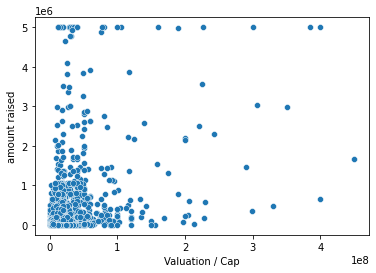

In [94]:
sns.scatterplot(data=val, x='Valuation / Cap', y='amount raised')

<AxesSubplot:xlabel='Valuation / Cap'>

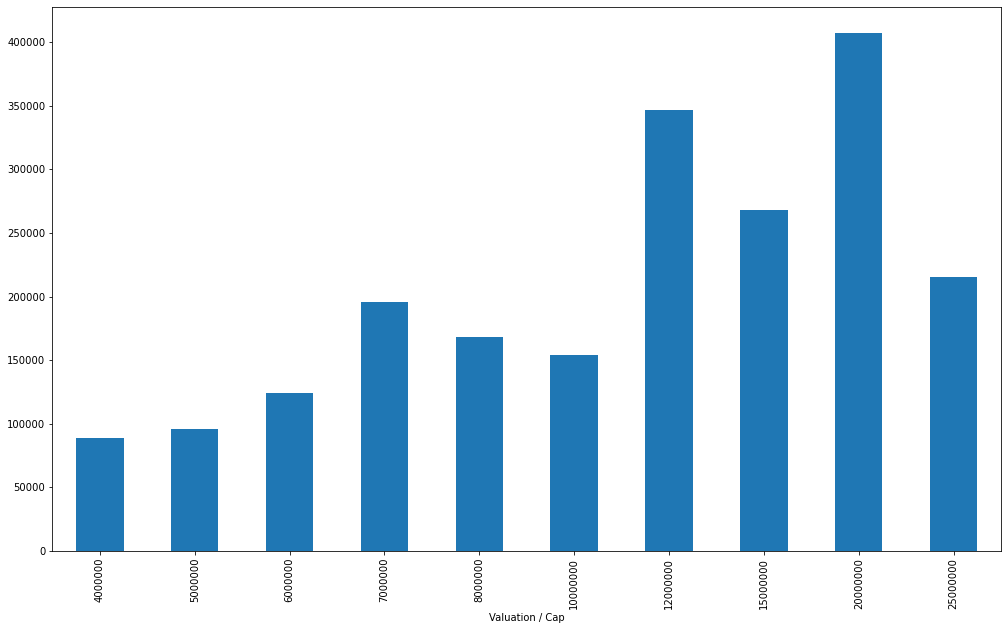

In [95]:
#visualizing average amount raised by top 10 valuation count
var.plot.bar(x='Valuation / Cap', figsize=(17,10))

In [96]:
cap=topval.groupby(['Valuation / Cap'])['success'].value_counts().unstack()
cap

success          False  True 
Valuation / Cap              
4000000             27      1
5000000             95      2
6000000             62      1
7000000             26      3
8000000             59      4
10000000           112      8
12000000            51      8
15000000            51      4
20000000            68     14
25000000            46      4

In [97]:
#sorting values as a percentage
cappct= cap.divide(cap.sum(axis=1), axis=0)
cappct[1].to_frame().sort_values(by=[1],ascending=False)

True
Valuation / Cap          
20000000         0.170732
12000000         0.135593
7000000          0.103448
25000000         0.080000
15000000         0.072727
10000000         0.066667
8000000          0.063492
4000000          0.035714
5000000          0.020619
6000000          0.015873

A 20 million valuation showed the highest success rate AND average raise amount AND a top 3 median raise. I don't think valuation is a key factor in determining investor appetite as there was some correlation between valuation and raise amount.  I do think that a 20m cap does show an ideal window in a companys life cycle where the raise is optimized.  That point is after they are starting up but before they get too big.  IE the company should have some accomplishments to hang their hat on before going to market for funding.

## Security Type

In [98]:
#insufficient count for equity tokens so they will be dropped from analysis
cf= cf[cf['security type'] != 'Equity - Tokens']

In [99]:
#describe for security type data
st=cf.groupby(['security type']).agg(agg_func)
st

amount raised                                              \
                        describe                                               
                           count           mean            std  min      25%   
security type                                                                  
Convertible Note           178.0  228879.859551  404713.342701  0.0  30900.0   
Debt                       239.0  127955.184100  482361.507492  0.0  17800.0   
Equity - Common            795.0  347647.235220  726112.972386  0.0  27502.0   
Equity - Preferred         222.0  567038.207207  916818.630751  0.0  85544.5   
Revenue Share              322.0   76935.114907  157176.207944  0.0   8675.0   
SAFE                       679.0  333116.737850  819230.720619  0.0  56487.5   

                                                    
                                                    
                         50%        75%        max  
security type                                       
Convertible Note     95228.0  230584.25  2814290.0  
Debt                 43670.0   91250.00  5000000.0  
Equity - Common     106445.0  308388.50  5000000.0  
Equity - Preferred  223195.5  584713.25  5000000.0  
Revenue Share        33775.0   80250.00  1706168.0  
SAFE                107061.0  227433.00  5000000.0

In [100]:
#show mean ranked by industry
star=cf.groupby('security type')['amount raised'].mean()
star.to_frame().sort_values(by='amount raised',ascending=False)

amount raised
security type                    
Equity - Preferred  567038.207207
Equity - Common     347647.235220
SAFE                333116.737850
Convertible Note    228879.859551
Debt                127955.184100
Revenue Share        76935.114907

<AxesSubplot:xlabel='security type'>

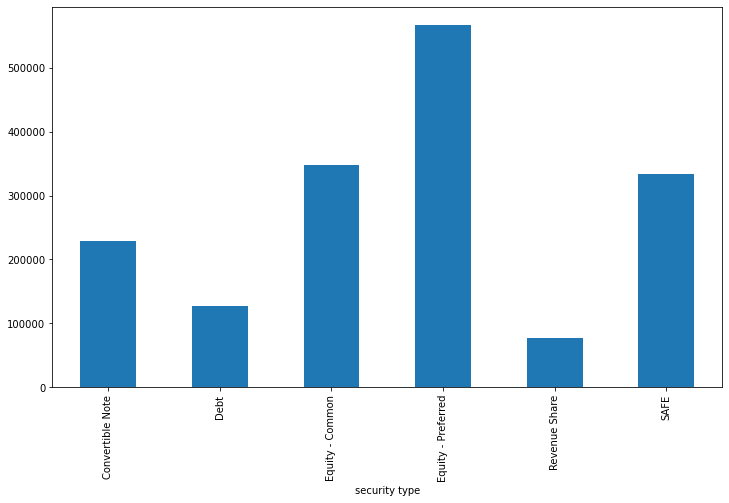

In [101]:
#visualizing average amount raised by security type
star.plot.bar(x='security type', figsize=(12,7))

In [102]:
#show median ranked by industry
medstar=cf.groupby('security type')['amount raised'].median()
medstar.to_frame().sort_values(by='amount raised',ascending=False)

amount raised
security type                    
Equity - Preferred       223195.5
SAFE                     107061.0
Equity - Common          106445.0
Convertible Note          95228.0
Debt                      43670.0
Revenue Share             33775.0

<AxesSubplot:xlabel='security type'>

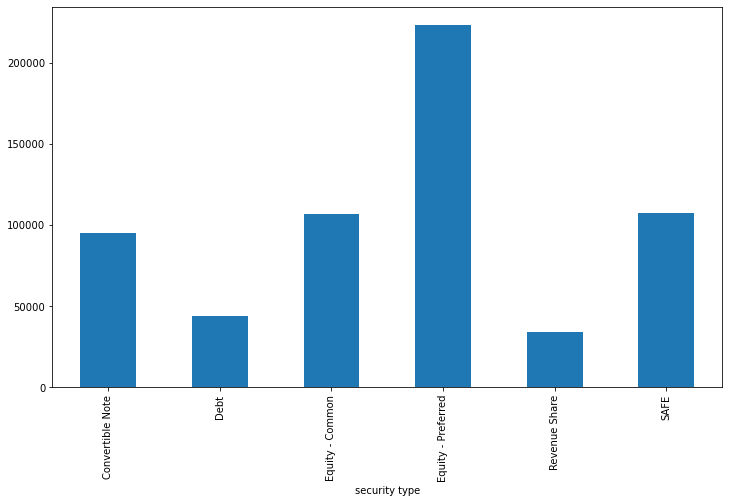

In [103]:
#visualizing average amount raised by security type
medstar.plot.bar(x='security type', figsize=(12,7))

In [104]:
stype=cf.groupby(['security type'])['success'].value_counts().unstack()
stype

success             False  True 
security type                   
Convertible Note      158     20
Debt                  231      8
Equity - Common       657    138
Equity - Preferred    154     68
Revenue Share         316      6
SAFE                  599     80

In [105]:
#sorting values as a percentage
stypepct= stype.divide(stype.sum(axis=1), axis=0)
stypepct[1].to_frame().sort_values(by=[1],ascending=False)

True
security type               
Equity - Preferred  0.306306
Equity - Common     0.173585
SAFE                0.117820
Convertible Note    0.112360
Debt                0.033473
Revenue Share       0.018634

In [106]:
#looking at security type by industry
pd.set_option('display.max_rows', 500)
cf.groupby('security type')['industry'].value_counts()

security type       industry                                         
Convertible Note    Food, Beverage, & Restaurants                         26
                    Healthcare & Pharmaceuticals                          20
                    Transportation, Automotive, Aviation, & Aerospace     16
                    Energy, Power, & Natural Resources                    15
                    Business Services, Software, & Applications           14
                    Media, Entertainment & Publishing                     14
                    Alcohol, Tobacco, & Recreational Drugs                13
                    Financial & Insurance Products & Services             12
                    Fitness & Wellness                                    10
                    Consumer Products, Goods & Services                    8
                    Farming & Agriculture                                  5
                    Travel and Hospitality                                 5
      

Preferred equity offerings have the highest mean, median, and success rates.  Preferred equity is also used most in healthcare, media, and business services industries which are actually average/weak performing industries.  Preferred equity may be a key variable in determining amount raised.

## Revenue

In [107]:
#describe for annual revenue data
pd.reset_option('display.max_rows')
print(cf['annual revenue'].mean())
print(cf['annual revenue'].median())

663588.0275154004
8651.0


In [108]:
#making sure no negative values and checking stats
cf['annual revenue'].describe()

count    2.435000e+03
mean     6.635880e+05
std      3.405374e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.651000e+03
75%      2.871990e+05
max      9.608639e+07
Name: annual revenue, dtype: float64

In [109]:
#value counts for annual rev
cf['annual revenue'].value_counts()

0           1100
50000          5
5000           4
10000          4
1000           3
            ... 
137858         1
103045         1
324237         1
30522000       1
1947694        1
Name: annual revenue, Length: 1278, dtype: int64

Almost have of the companies attempting a cf raise have 0 revenue.

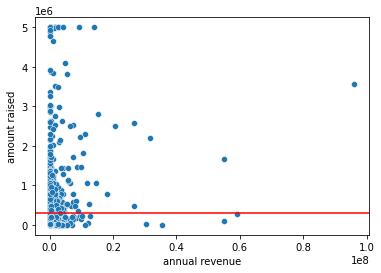

In [110]:
#checking for pattern
ax=sns.scatterplot(data=cf, x='annual revenue', y='amount raised')
ax.axhline(cf['amount raised'].mean(), color='red')
#plt.xlim(0,100000000)

In [111]:
#checking mean of
cf.groupby(['annual revenue'])['amount raised'].mean([0])

annual revenue
0           2.416076e+05
3           2.500000e+04
26          1.446000e+05
35          2.400000e+03
41          1.266600e+05
                ...     
35478000    0.000000e+00
55000000    1.677894e+06
55120381    9.579500e+04
59063000    2.747880e+05
96086389    3.558736e+06
Name: amount raised, Length: 1278, dtype: float64

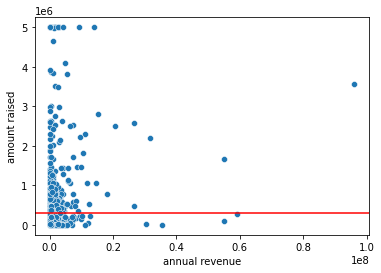

In [112]:
#looking at annual rev without prerevenue companies
non0= cf[cf['annual revenue'] > 0]
#visualizing revenue generating companies compared to the average cf raise
ax=sns.scatterplot(data=non0, x='annual revenue', y='amount raised')
ax.axhline(cf['amount raised'].mean(), color='red')
#plt.xlim(0,1100)

In [113]:
#checking average raised amount for companies with revenue
non0['amount raised'].mean()

343651.6359550562

In [114]:
#success split for companies with no annual rev
anre=cf.groupby(['annual revenue'])['success'].value_counts().unstack()
anre

success         False  True 
annual revenue              
0               990.0  110.0
3                 1.0    NaN
26                1.0    NaN
35                1.0    NaN
41                1.0    NaN
...               ...    ...
35478000          1.0    NaN
55000000          NaN    1.0
55120381          1.0    NaN
59063000          1.0    NaN
96086389          NaN    1.0

[1278 rows x 2 columns]

In [115]:
#sorting success rate as pct for 0 annual revenue companies
print('success rate for companies with no rev is', 110/(990+110))

success rate for companies with no rev is 0.1


In [116]:
#success split for revenue companies with success
non0['success'].value_counts()

False    1125
True      210
Name: success, dtype: int64

In [117]:
print('success rate for companies with rev is', 210/(1125+210))

success rate for companies with rev is 0.15730337078651685


In [118]:
#checking correlation with annual rev and amount raised
non0['annual revenue'].corr(non0['amount raised'])

0.20530848624806614

The average amount raised for pre revenue companies doing a crowdfund is 241k while companies with revenue average a 343k raise.  There is also a 50% higher success rate. There is also a small correlation between rev and amount raised.  

## Revenue Multiple

In [119]:
#describe stats on rev multiple
cf['revenue multiple'].describe()

count    2435.000000
mean       98.927433
std       246.711437
min         0.000000
25%         0.000000
50%         0.000000
75%        37.300000
max      1000.000000
Name: revenue multiple, dtype: float64

In [120]:
#checking rev multiple value counts
cf['revenue multiple'].value_counts()

0.0       1347
1000.0     122
4.0          6
7.9          6
32.0         6
          ... 
183.9        1
13.3         1
2.2          1
839.3        1
67.6         1
Name: revenue multiple, Length: 705, dtype: int64

In [121]:
#revenue multiple mean
cf['revenue multiple'].mean()

98.92743326488707

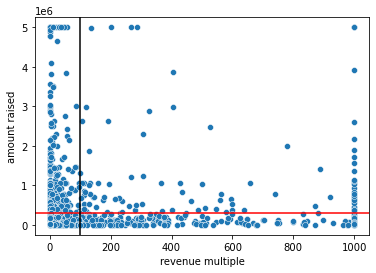

In [122]:
#checking for pattern
ax=sns.scatterplot(data=cf, x='revenue multiple', y='amount raised')
ax.axhline(cf['amount raised'].mean(), color='red')
ax.axvline(cf['revenue multiple'].mean(), color= 'black')
#plt.xlim(0,100000000)

In [123]:
#checking correlation with revenue multiple and amount raised
cf['revenue multiple'].corr(cf['amount raised'])

0.037162630916788945

In [124]:
#checking average amount raised 
cf.groupby('revenue multiple')['amount raised'].mean()

revenue multiple
0.0       2.168763e+05
0.3       9.579500e+04
0.8       2.747880e+05
1.1       7.879100e+04
1.4       1.070000e+06
              ...     
977.4     0.000000e+00
979.4     0.000000e+00
984.1     6.687700e+04
997.9     2.475190e+05
1000.0    3.845441e+05
Name: amount raised, Length: 705, dtype: float64

In [125]:
non0mult= cf[cf['revenue multiple'] > 0]
non0mult['amount raised'].mean()

397436.578125

In [126]:
#amount raised correlation with only non 0 multiples
non0mult['revenue multiple'].corr(non0mult['amount raised'])

-0.02962546033806865

In [127]:
#success split for companies with no annual rev
remu=cf.groupby(['revenue multiple'])['success'].value_counts().unstack()
remu

success            False  True 
revenue multiple               
0.0               1231.0  116.0
0.3                  1.0    NaN
0.8                  1.0    NaN
1.1                  2.0    NaN
1.4                  NaN    1.0
...                  ...    ...
977.4                1.0    NaN
979.4                1.0    NaN
984.1                1.0    NaN
997.9                1.0    NaN
1000.0              99.0   23.0

[705 rows x 2 columns]

In [128]:
print('success rate for companies with no rev mult is', 116/(1231+116))

success rate for companies with no rev mult is 0.08611729769858946


In [129]:
#success split for revenue companies with success
non0mult['success'].value_counts()

False    884
True     204
Name: success, dtype: int64

In [130]:
print('success rate for companies with a rev mult is', 204/(884+204))

success rate for companies with a rev mult is 0.1875


In [131]:
#checking balance of security type for companies with 0 multiple
cf.groupby(['revenue multiple'])['security type'].value_counts()

revenue multiple  security type     
0.0               Equity - Common       354
                  Revenue Share         322
                  SAFE                  278
                  Debt                  238
                  Equity - Preferred     87
                                       ... 
997.9             Equity - Common         1
1000.0            Equity - Common        54
                  SAFE                   43
                  Convertible Note       14
                  Equity - Preferred     11
Name: security type, Length: 866, dtype: int64

There is minimal correlation between revenue multiple and amount raised.  Company valuation seems to be less important in crowdfunding offerings. Average amount raised for companies with 0 revenue multiple is 216k vs companies with a non 0 rev multiple of almost 400k.  Success rates are much higher for companies with non zero revenue multiples (18.75 percent compared to 8.6 percent).

## Number of Investors and Average Daily Raise

In [132]:
cf

company      status  \
0                      Wunderkeks      Active   
1                        VitalFlo      Active   
2                Uncle Ed’s Vodka      Active   
3               Philosopher Foods      Active   
4          Swiss Precision Active      Active   
...                           ...         ...   
2435             Meadows Italiano  Not Funded   
2436               KSITY Pizzeria  Not Funded   
2437                      Hideout  Not Funded   
2438  Planted Recovery Telehealth  Not Funded   
2439                  Roast Umber  Not Funded   

                                    industry     platform  Valuation / Cap  \
0              Food, Beverage, & Restaurants     Wefunder         20000000   
1               Healthcare & Pharmaceuticals     Wefunder          7000000   
2     Alcohol, Tobacco, & Recreational Drugs     Wefunder         25000000   
3              Food, Beverage, & Restaurants     Wefunder          6400000   
4               Healthcare & Pharmaceuticals  StartEngine         12000000   
...                                      ...          ...              ...   
2435           Food, Beverage, & Restaurants     MainVest                0   
2436           Food, Beverage, & Restaurants     MainVest                0   
2437           Food, Beverage, & Restaurants     Wefunder          9000000   
2438                      Fitness & Wellness     Wefunder          5000000   
2439           Food, Beverage, & Restaurants     MainVest                0   

         security type momentum  amount raised start date close date  \
0                 SAFE     Cool          38818 2022-11-01 2023-04-30   
1                 SAFE     Warm         235356 2022-11-01 2023-04-30   
2                 SAFE     Cold         117367 2022-11-01 2023-04-30   
3     Convertible Note     Cold          81311 2022-11-01 2023-04-30   
4      Equity - Common     Cold          47449 2022-11-01 2023-03-02   
...                ...      ...            ...        ...        ...   
2435     Revenue Share   Closed          10600 2021-03-18 2021-05-26   
2436     Revenue Share   Closed           4900 2021-03-18 2021-05-03   
2437              SAFE   Closed         202950 2021-03-16 2021-03-31   
2438  Convertible Note   Closed          30100 2021-03-15 2021-09-02   
2439     Revenue Share   Closed          26200 2021-03-15 2022-01-14   

      annual revenue  revenue multiple  investors  average daily raise  \
0            4943466               4.0          0                  413   
1              72690              96.3         94                 2504   
2             315603              79.2         16                 1249   
3             831044               7.7         53                  865   
4               5850            1000.0         88                  505   
...              ...               ...        ...                  ...   
2435               0               0.0         22                  154   
2436               0               0.0          3                  107   
2437          317176              28.4          0                13530   
2438               0               0.0         10                  176   
2439           31304               0.0         58                   86   

      min investment reg type  minority founders  Women Founders  \
0                100    RegCF               True           False   
1                250    RegCF              False           False   
2                100    RegCF              False           False   
3                100    RegCF              False           False   
4                200    RegCF               True           False   
...              ...      ...                ...             ...   
2435             100    RegCF              False           False   
2436             100    RegCF              False            True   
2437             100    RegCF               True           False   
2438             100    RegCF              False           False  

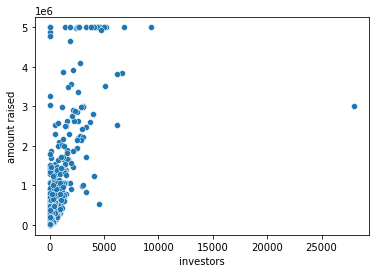

In [133]:
#checking for pattern
ax=sns.scatterplot(data=cf, x='investors', y='amount raised')
#ax.axhline(cf['amount raised'].mean(), color='red')
#ax.axvline(, color= 'black')
#plt.xlim(0,100000000)

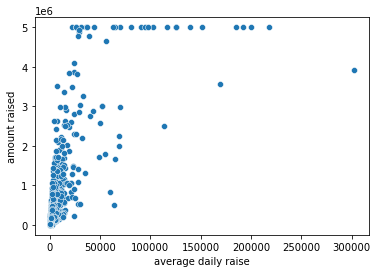

In [134]:
#checking for pattern
ax=sns.scatterplot(data=cf, x='average daily raise', y='amount raised')
#ax.axhline(cf['amount raised'].mean(), color='red')
#ax.axvline(, color= 'black')
#plt.xlim(0,100000000)

In [135]:
#dropping outlier investor amount
cf= cf[cf['investors'] <25000]

In [136]:
#investors describe stats
cf.investors.describe()

count    2434.000000
mean      235.843468
std       635.816314
min         0.000000
25%         6.250000
50%        58.000000
75%       173.000000
max      9348.000000
Name: investors, dtype: float64

In [137]:
cf['average daily raise'].describe()

count      2434.000000
mean       3552.605588
std       14585.111356
min           0.000000
25%         263.000000
50%         778.000000
75%        2077.500000
max      302308.000000
Name: average daily raise, dtype: float64

In [138]:
#average number of investors in a success vs non success
cf.groupby('success')['investors'].mean()

success
False      93.873759
True     1177.115987
Name: investors, dtype: float64

In [139]:
#median investors for success and non success
cf.groupby('success')['investors'].median()

success
False     45
True     671
Name: investors, dtype: int32

In [140]:
#average daily raise for success and non success
cf.groupby('success')['average daily raise'].mean()

success
False     1089.535225
True     19882.993730
Name: average daily raise, dtype: float64

In [141]:
#median daily raise for success and non success
cf.groupby(('success'))['average daily raise'].median()

success
False     606
True     7537
Name: average daily raise, dtype: int32

In [142]:
#correlation of average daily raise and number of investors with amount raised
print(cf['average daily raise'].corr(cf['amount raised']))
print(cf['investors'].corr(cf['amount raised']))

0.7328071642374419
0.7928571542355451


Number of investors and average daily raise have the highest correlation to amount raised of any variable.  The problem is that they are calculated after the offering launches making these stats only useful for tracking progress.  Median amounts here are more important.  Median daily raise for a successful offering is 7500 and median number of investors is 671.

## Linear Regression

Before building a linear regression model, we need to make sure certain assumptions are being met to make sure the results are reliable.  The data must be linear, normal and homoscedastic.

In [143]:
cf.dtypes

company                        object
status                         object
industry                       object
platform                       object
Valuation / Cap                 int32
security type                  object
momentum                       object
amount raised                   int32
start date             datetime64[ns]
close date             datetime64[ns]
annual revenue                  int32
revenue multiple              float64
investors                       int32
average daily raise             int32
min investment                  int32
reg type                       object
minority founders                bool
Women Founders                   bool
social impact                    bool
success                          bool
dtype: object

In [144]:
#checking for specialization on industry by platform
cf.groupby('platform')['industry'].value_counts()

platform          industry                                         
ALAO Invest       Food, Beverage, & Restaurants                        1
Arcview Capital   Financial & Insurance Products & Services            1
Castle Placement  Energy, Power, & Natural Resources                   3
                  Healthcare & Pharmaceuticals                         2
                  Real Estate & Construction                           1
                                                                      ..
WunderFund        Alcohol, Tobacco, & Recreational Drugs               1
                  Food, Beverage, & Restaurants                        1
                  Media, Entertainment & Publishing                    1
                  Real Estate & Construction                           1
                  Transportation, Automotive, Aviation, & Aerospace    1
Name: industry, Length: 282, dtype: int64

We are going to drop platform from the study because we are interested in predicting which type of startups with their various structures will have successful raises, not which funding portals are the strongest.  Presumably each portal does not have a focus on industry.

In [145]:
#checking value counts of industries in preparation of dropping those with less than 50
cf.industry.value_counts()

Food, Beverage, & Restaurants                        488
Media, Entertainment & Publishing                    248
Business Services, Software, & Applications          239
Healthcare & Pharmaceuticals                         216
Consumer Products, Goods & Services                  178
Alcohol, Tobacco, & Recreational Drugs               175
Financial & Insurance Products & Services            135
Transportation, Automotive, Aviation, & Aerospace    120
Energy, Power, & Natural Resources                   111
Real Estate & Construction                            99
Fitness & Wellness                                    83
Education, Training, & Coaching                       44
Apparel & Fashion                                     44
Beauty & Personal Care                                39
Logistics, Delivery, & Supply Chain                   37
Security, Cybersecurity, & Defense                    34
Marketing & Advertising                               33
Travel and Hospitality         

In [146]:
#dropping industries with a lower count than 80
cfidummy= cf[cf.groupby('industry')['industry'].transform('count')>80].copy()

In [147]:
#dropping platforms with a lower count than 40
#cfplatdummy = cfidummy[cfidummy.groupby('platform')['platform'].transform('count')>40].copy()

In [148]:
# Create a list of all the categorical features
cols_to_transform = ['security type', 'industry'] #'platform']
# Create a dataframe with the new dummy columns created from the cols_to_transform list
cfdummies = pd.get_dummies(data=cfidummy, columns=cols_to_transform, drop_first=True)
cfdummies= cfdummies.drop(['company', 'status', 'reg type', 'momentum', 'average daily raise', 'platform'], axis=1)
cfdummies= cfdummies.drop(['start date', 'close date'], axis=1)
cfdummies


Valuation / Cap  amount raised  annual revenue  revenue multiple  \
0            20000000          38818         4943466               4.0   
1             7000000         235356           72690              96.3   
2            25000000         117367          315603              79.2   
3             6400000          81311          831044               7.7   
4            12000000          47449            5850            1000.0   
...               ...            ...             ...               ...   
2435                0          10600               0               0.0   
2436                0           4900               0               0.0   
2437          9000000         202950          317176              28.4   
2438          5000000          30100               0               0.0   
2439                0          26200           31304               0.0   

      investors  min investment  minority founders  Women Founders  \
0             0             100               True           False   
1            94             250              False           False   
2            16             100              False           False   
3            53             100              False           False   
4            88             200               True           False   
...         ...             ...                ...             ...   
2435         22             100              False           False   
2436          3             100              False            True   
2437          0             100               True           False   
2438         10             100              False           False   
2439         58             100              False           False   

      social impact  success  security type_Debt  \
0             False    False                   0   
1             False    False                   0   
2             False    False                   0   
3              True    False                   0   
4             False    False                   0   
...             ...      ...                 ...   
2435          False    False                   0   
2436           True    False                   0   
2437          False    False                   0   
2438           True    False                   0   
2439          False    False                   0   

      security type_Equity - Common  security type_Equity - Preferred  \
0                                 0                                 0   
1                                 0                                 0   
2                                 0                                 0   
3                                 0                                 0   
4                                 1                                 0   
...                             ...                               ...   
2435                              0                                 0   
2436                              0                                 0   
2437                              0                                 0   
2438                              0                                 0   
2439                              0                                 0   

      security type_Revenue Share  security type_SAFE  \
0                               0                   1   
1                               0                   1   
2                               0                   1   
3                               0                   0   
4                               0                   0   
...                           ...                 ...   
2435                            1                   0   
2436                            1                   0   
2437                            0                   1   
2438                            0                   0   
2439                            1                   0   

      industry_Business Services, Software, & Applications  \
0                          

In [149]:
#correlations for cf dummmies
pd.set_option('display.max_columns', 500)
cfdummies.corr()

Valuation / Cap  \
Valuation / Cap                                            1.000000   
amount raised                                              0.383766   
annual revenue                                             0.348191   
revenue multiple                                           0.123693   
investors                                                  0.301224   
min investment                                             0.095602   
minority founders                                         -0.050433   
Women Founders                                            -0.089503   
social impact                                              0.067738   
success                                                    0.334000   
security type_Debt                                        -0.176017   
security type_Equity - Common                              0.227361   
security type_Equity - Preferred                           0.128478   
security type_Revenue Share                               -0.213340   
security type_SAFE                                        -0.021111   
industry_Business Services, Software, & Applica...        -0.001131   
industry_Consumer Products, Goods & Services              -0.029925   
industry_Energy, Power, & Natural Resources                0.121627   
industry_Financial & Insurance Products & Services         0.052235   
industry_Fitness & Wellness                               -0.004512   
industry_Food, Beverage, & Restaurants                    -0.180156   
industry_Healthcare & Pharmaceuticals                      0.104567   
industry_Media, Entertainment & Publishing                -0.039232   
industry_Real Estate & Construction                        0.028329   
industry_Transportation, Automotive, Aviation, ...         0.163345   

                                                    amount raised  \
Valuation / Cap                                          0.383766   
amount raised                                            1.000000   
annual revenue                                           0.160250   
revenue multiple                                         0.046954   
investors                                                0.808311   
min investment                                           0.046622   
minority founders                                       -0.060778   
Women Founders                                          -0.065307   
social impact                                            0.068052   
success                                                  0.708109   
security type_Debt                                      -0.088678   
security type_Equity - Common                            0.058774   
security type_Equity - Preferred                         0.119342   
security type_Revenue Share                             -0.130362   
security type_SAFE                                       0.040141   
industry_Business Services, Software, & Applica...       0.007624   
industry_Consumer Products, Goods & Services            -0.028075   
industry_Energy, Power, & Natural Resources              0.090146   
industry_Financial & Insurance Products & Services       0.090033   
industry_Fitness & Wellness                             -0.017360   
industry_Food, Beverage, & Restaurants                  -0.107873   
industry_Healthcare & Pharmaceuticals                    0.014919   
industry_Media, Entertainment & Publishing              -0.043941   
industry_Real Estate & Construction                      0.077882   
industry_Transportation, Automotive, Aviation, ...       0.073842   

                                                    annual revenue  \
Valuation / Cap                                           0.348191   
amount raised                                             0.160250   
annual revenue                                            1.000000   
revenue multiple                                         -0.061225   
investors                                                 0.

In [150]:
# create predictors
predictors = cfdummies.drop(['amount raised'], axis=1)

# create model intercept
predictors_int = sm.add_constant(predictors)

# fit model to data
model = sm.OLS(cfdummies['amount raised'],predictors_int.astype(float)).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          amount raised   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     259.3
Date:                Sat, 25 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:38:52   Log-Likelihood:                -29666.
No. Observations:                2092   AIC:                         5.938e+04
Df Residuals:                    2067   BIC:                         5.952e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                      -3.049e+04   4.03e+04     -0.756      0.450    -1.1e+05    4.86e+04
Valuation / Cap                                                0.0022      0.000      7.679      0.000       0.002       0.003
annual revenue                                                -0.0021      0.002     -0.901      0.368      -0.007       0.002
revenue multiple                                             -22.3301     33.202     -0.673      0.501     -87.442      42.782
investors                                                    647.5948     15.268     42.415      0.000     617.652     677.537
min investment                                                68.4207     30.546      2.240      0.025       8.516     128.326
minority founders                                           -5.13e+04   1.67e+04     -3.064      0.002   -8.41e+04   -1.85e+04
Women Founders                                             -1981.1537   1.77e+04     -0.112      0.911   -3.67e+04    3.27e+04
social impact                                              -6014.0826   2.19e+04     -0.275      0.783   -4.89e+04    3.69e+04
success                                                     6.794e+05    2.9e+04     23.425      0.000    6.23e+05    7.36e+05
security type_Debt                                          6.485e+04   3.95e+04      1.641      0.101   -1.27e+04    1.42e+05
security type_Equity - Common                              -6772.7377   3.19e+04     -0.213      0.832   -6.92e+04    5.57e+04
security type_Equity - Preferred                           -1.032e+04   3.94e+04     -0.262      0.794   -8.77e+04     6.7e+04
security type_Revenue Share                                 1.751e+04   3.76e+04      0.466      0.641   -5.62e+04    9.12e+04
security type_SAFE                                         -9423.7732   3.26e+04     -0.289      0.773   -7.34e+04    5.46e+04
industry_Business Services, Software, & Applications        1.011e+05   3.67e+04      2.756      0.006    2.92e+04    1.73e+05
industry_Consumer Products, Goods & Services                4.421e+04   3.83e+04      1.156      0.248   -3.08e+04    1.19e+05
industry_Energy, Power, & Natural Resources                 2.431e+04   4.65e+04      0.522      0.601   -6.69e+04    1.16e+05
industry_Financial & Insurance Products & Services          5.714e+04   4.21e+04      1.356      0.175   -2.55e+04     1.4e+05
industry_Fitness & Wellness                                 5.044e+04   4.77e+04      1.058      0.290   -4.31e+04    1.44e+05
industry_Food, Beverage, & Restaurants                      5.424e+04   3.15e+04      1.721      0.085   -7551.640    1.16e+05
industry_Healthcare & Pharmaceutica

[16:38:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[16:38:53] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:38:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


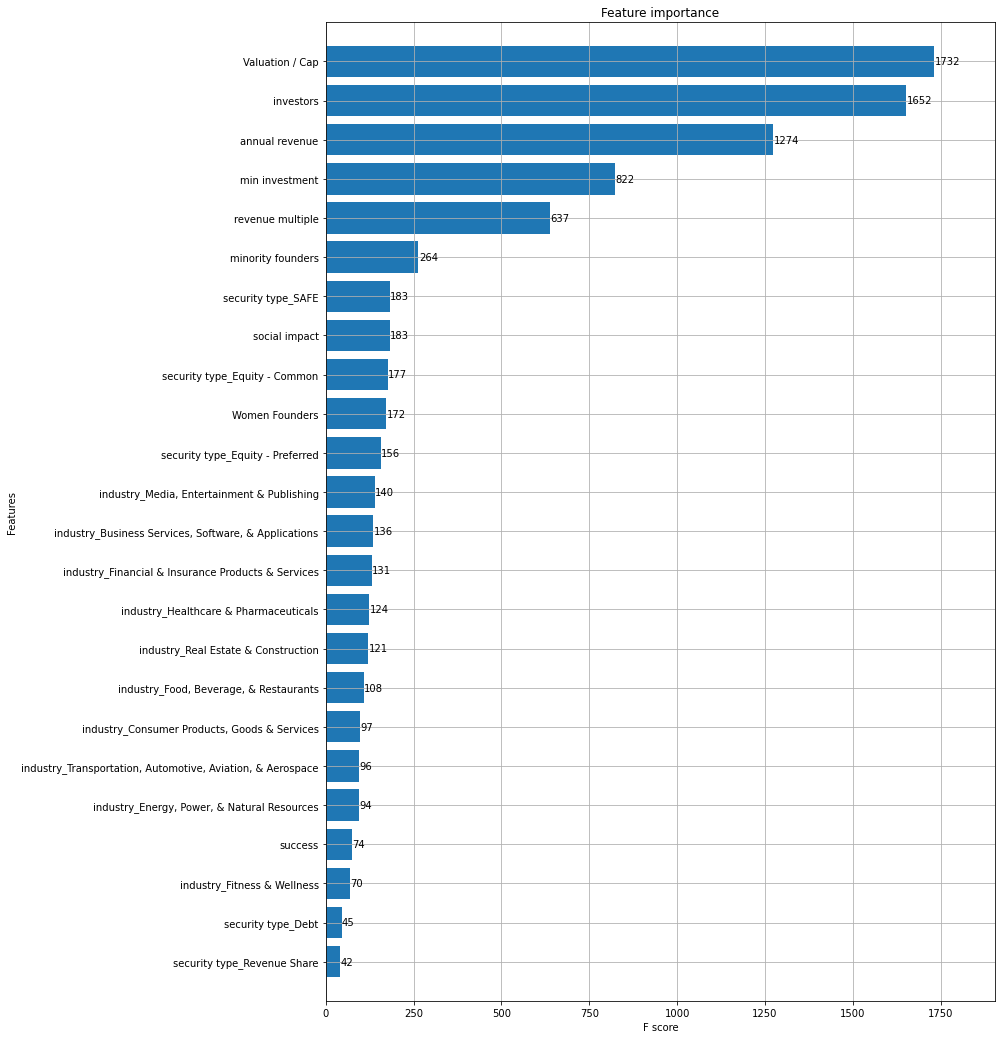

In [151]:
from sklearn import model_selection, preprocessing
import xgboost as xgb

train_y = cfdummies['amount raised']
train_X = cfdummies.drop(["amount raised"], axis=1)

xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}
dtrain = xgb.DMatrix(train_X, train_y, feature_names=train_X.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=100)

# plot the important features #
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show()

The r squared is fairly strong but there are a number of p values that are unusable and their may be colinearity issues, or variables that are highly correlated that are influencing the model.

In [152]:
#Viewing the variable pairs that have the highest correlation coefficient 
dummycorr = cfdummies.corr().abs().stack().reset_index().sort_values(0, ascending=False)

dummycorr['pairs'] = list(zip(dummycorr.level_0, dummycorr.level_1))

dummycorr.set_index(['pairs'], inplace = True)

dummycorr.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
dummycorr.columns = ['cc']

dummycorr.drop_duplicates(inplace=True)

dummycorr[(dummycorr.cc>.5) & (dummycorr.cc<1)]

cc
pairs                               
(amount raised, investors)  0.808311
(success, amount raised)    0.708109
(investors, success)        0.583151

Investors will be dropped as the correlation is too high with amount raised and is data that would be seen retroactively anyway.  No need for success either as it is just a function of amount raised.

In [153]:
#dropping highly correlated columns
cfdummies.drop(columns=['investors', 'success'], inplace = True)

In [154]:
# create predictors
predictors = cfdummies.drop(['amount raised'], axis=1)

# create model intercept
predictors_int = sm.add_constant(predictors)

# fit model to data
model = sm.OLS(cfdummies['amount raised'],predictors_int.astype(float)).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          amount raised   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     19.62
Date:                Sat, 25 Feb 2023   Prob (F-statistic):           7.77e-70
Time:                        16:38:54   Log-Likelihood:                -30920.
No. Observations:                2092   AIC:                         6.189e+04
Df Residuals:                    2069   BIC:                         6.202e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                       1.192e+05   7.33e+04      1.626      0.104   -2.45e+04    2.63e+05
Valuation / Cap                                                0.0073      0.000     14.591      0.000       0.006       0.008
annual revenue                                                 0.0072      0.004      1.692      0.091      -0.001       0.016
revenue multiple                                              -7.5347     60.407     -0.125      0.901    -125.999     110.929
min investment                                               -36.3553     55.362     -0.657      0.511    -144.925      72.215
minority founders                                          -6.652e+04   3.05e+04     -2.184      0.029   -1.26e+05   -6793.957
Women Founders                                             -1.996e+04   3.22e+04     -0.620      0.535   -8.31e+04    4.32e+04
social impact                                               3.892e+04   3.98e+04      0.979      0.328   -3.91e+04    1.17e+05
security type_Debt                                          9590.6746   7.19e+04      0.133      0.894   -1.32e+05    1.51e+05
security type_Equity - Common                               2.478e+04    5.8e+04      0.427      0.669   -8.89e+04    1.38e+05
security type_Equity - Preferred                            2.081e+05   7.14e+04      2.913      0.004     6.8e+04    3.48e+05
security type_Revenue Share                                -1.309e+04   6.84e+04     -0.191      0.848   -1.47e+05    1.21e+05
security type_SAFE                                          1.034e+05   5.93e+04      1.743      0.081   -1.29e+04     2.2e+05
industry_Business Services, Software, & Applications         3.08e+04   6.67e+04      0.462      0.644      -1e+05    1.62e+05
industry_Consumer Products, Goods & Services               -2.334e+04   6.96e+04     -0.335      0.737    -1.6e+05    1.13e+05
industry_Energy, Power, & Natural Resources                 1.389e+05   8.46e+04      1.642      0.101    -2.7e+04    3.05e+05
industry_Financial & Insurance Products & Services          1.828e+05   7.66e+04      2.384      0.017    3.24e+04    3.33e+05
industry_Fitness & Wellness                                -3.746e+04   8.68e+04     -0.432      0.666   -2.08e+05    1.33e+05
industry_Food, Beverage, & Restaurants                      2677.4500   5.73e+04      0.047      0.963    -1.1e+05    1.15e+05
industry_Healthcare & Pharmaceuticals                      -2.985e+04   6.82e+04     -0.438      0.662   -1.64e+05    1.04e+05
industry_Media, Entertainment & Publishing                 -3.705e+04   6.48e+04     -0.571      0.568   -1.64e+05    9.01e+04
industry_Real Estate & Construction

Once multicollinearity was addressed the r squared score dropped tremendously.  There are also a number of columns with unusably high p-values.  Lets do some visual checks then try some transformations to improve the performance of the model.

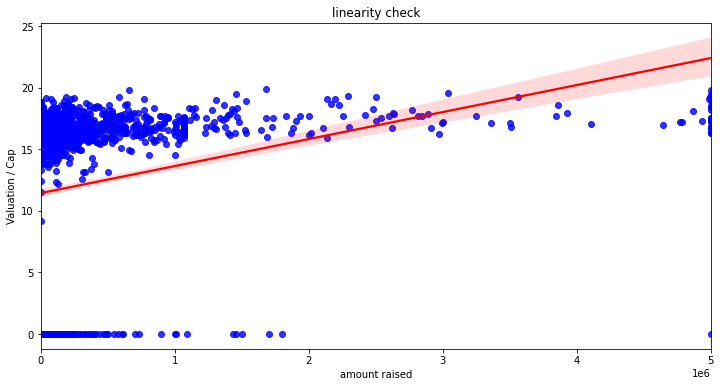

In [265]:
#visualizing normality of square footage and home price
plt.figure(figsize=(12,6))
plt.title('linearity check')
sns.regplot(cfdummies['amount raised'], cfdummies['Valuation / Cap'], scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.show()

In [264]:
#checking for normality with QQ plot

residuals = model.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

AttributeError: 'Booster' object has no attribute 'resid'

In [263]:
#visualizing homoscedasticity
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "amount raised", fig=fig)
plt.show()

AttributeError: 'Booster' object has no attribute 'model'

<Figure size 1080x576 with 0 Axes>

The data is not linear and the r squred score is quite poor.  We will do some feature scaling and normalizing to see if we can improve model performance.  As a large amount of data contains 0, log transformations may not be the way to go so we will try other methods.

#### Log Transformations

Because we are working with right skewed data and many 0 values, we are adding 1 to each 0 value to avoid errors for our log transformation.

In [158]:
non_normal = predictors
for feat in non_normal:
    cfdummies[feat]= cfdummies[feat].map(lambda x: np.log(x+1))

In [159]:
# create predictors
predictors = cfdummies.drop(['amount raised'], axis=1)

# create model intercept
predictors_int = sm.add_constant(predictors)

# fit model to data
model = sm.OLS(cfdummies['amount raised'],predictors_int.astype(float)).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          amount raised   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     9.962
Date:                Sat, 25 Feb 2023   Prob (F-statistic):           1.70e-32
Time:                        16:39:17   Log-Likelihood:                -31013.
No. Observations:                2092   AIC:                         6.207e+04
Df Residuals:                    2069   BIC:                         6.220e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                      -5.792e+05    1.6e+05     -3.619      0.000   -8.93e+05   -2.65e+05
Valuation / Cap                                             3.928e+04   5983.956      6.564      0.000    2.75e+04     5.1e+04
annual revenue                                              1.251e+04   3164.685      3.952      0.000    6301.897    1.87e+04
revenue multiple                                           -1.194e+04   8948.868     -1.334      0.182   -2.95e+04    5608.188
min investment                                              1.559e+04   2.08e+04      0.749      0.454   -2.52e+04    5.64e+04
minority founders                                          -9.456e+04    4.6e+04     -2.057      0.040   -1.85e+05   -4398.383
Women Founders                                             -4.117e+04   4.86e+04     -0.847      0.397   -1.36e+05    5.41e+04
social impact                                               4.218e+04   5.99e+04      0.704      0.482   -7.54e+04     1.6e+05
security type_Debt                                          7.619e+05   1.71e+05      4.450      0.000    4.26e+05     1.1e+06
security type_Equity - Common                               1.263e+05   8.77e+04      1.439      0.150   -4.58e+04    2.98e+05
security type_Equity - Preferred                            4.242e+05   1.07e+05      3.949      0.000    2.13e+05    6.35e+05
security type_Revenue Share                                 8.007e+05   1.62e+05      4.935      0.000    4.82e+05    1.12e+06
security type_SAFE                                          1.713e+05   8.94e+04      1.917      0.055   -3941.515    3.47e+05
industry_Business Services, Software, & Applications        8.517e+04   1.01e+05      0.842      0.400   -1.13e+05    2.84e+05
industry_Consumer Products, Goods & Services               -1.964e+04   1.05e+05     -0.187      0.852   -2.26e+05    1.87e+05
industry_Energy, Power, & Natural Resources                 3.968e+05   1.29e+05      3.085      0.002    1.45e+05    6.49e+05
industry_Financial & Insurance Products & Services          3.751e+05   1.16e+05      3.232      0.001    1.47e+05    6.03e+05
industry_Fitness & Wellness                                -5.153e+04   1.31e+05     -0.393      0.694   -3.09e+05    2.06e+05
industry_Food, Beverage, & Restaurants                      2.485e+04   8.65e+04      0.287      0.774   -1.45e+05    1.94e+05
industry_Healthcare & Pharmaceuticals                        7.69e+04   1.04e+05      0.739      0.460   -1.27e+05    2.81e+05
industry_Media, Entertainment & Publishing                 -1.607e+04   9.89e+04     -0.162      0.871    -2.1e+05    1.78e+05
industry_Real Estate & Construction

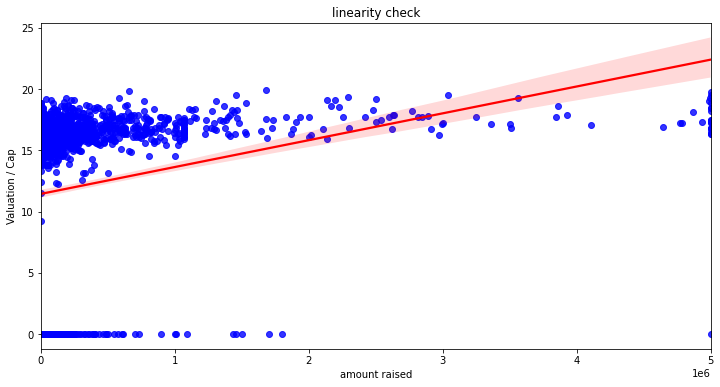

In [160]:
#visualizing normality of square footage and home price
plt.figure(figsize=(12,6))
plt.title('linearity check')
sns.regplot(cfdummies['amount raised'], cfdummies['Valuation / Cap'], scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.show()

array([[<AxesSubplot:title={'center':'Valuation / Cap'}>,
        <AxesSubplot:title={'center':'amount raised'}>,
        <AxesSubplot:title={'center':'annual revenue'}>,
        <AxesSubplot:title={'center':'revenue multiple'}>,
        <AxesSubplot:title={'center':'min investment'}>],
       [<AxesSubplot:title={'center':'minority founders'}>,
        <AxesSubplot:title={'center':'Women Founders'}>,
        <AxesSubplot:title={'center':'social impact'}>,
        <AxesSubplot:title={'center':'security type_Debt'}>,
        <AxesSubplot:title={'center':'security type_Equity - Common'}>],
       [<AxesSubplot:title={'center':'security type_Equity - Preferred'}>,
        <AxesSubplot:title={'center':'security type_Revenue Share'}>,
        <AxesSubplot:title={'center':'security type_SAFE'}>,
        <AxesSubplot:title={'center':'industry_Business Services, Software, & Applications'}>,
        <AxesSubplot:title={'center':'industry_Consumer Products, Goods & Services'}>],
       [<AxesSub

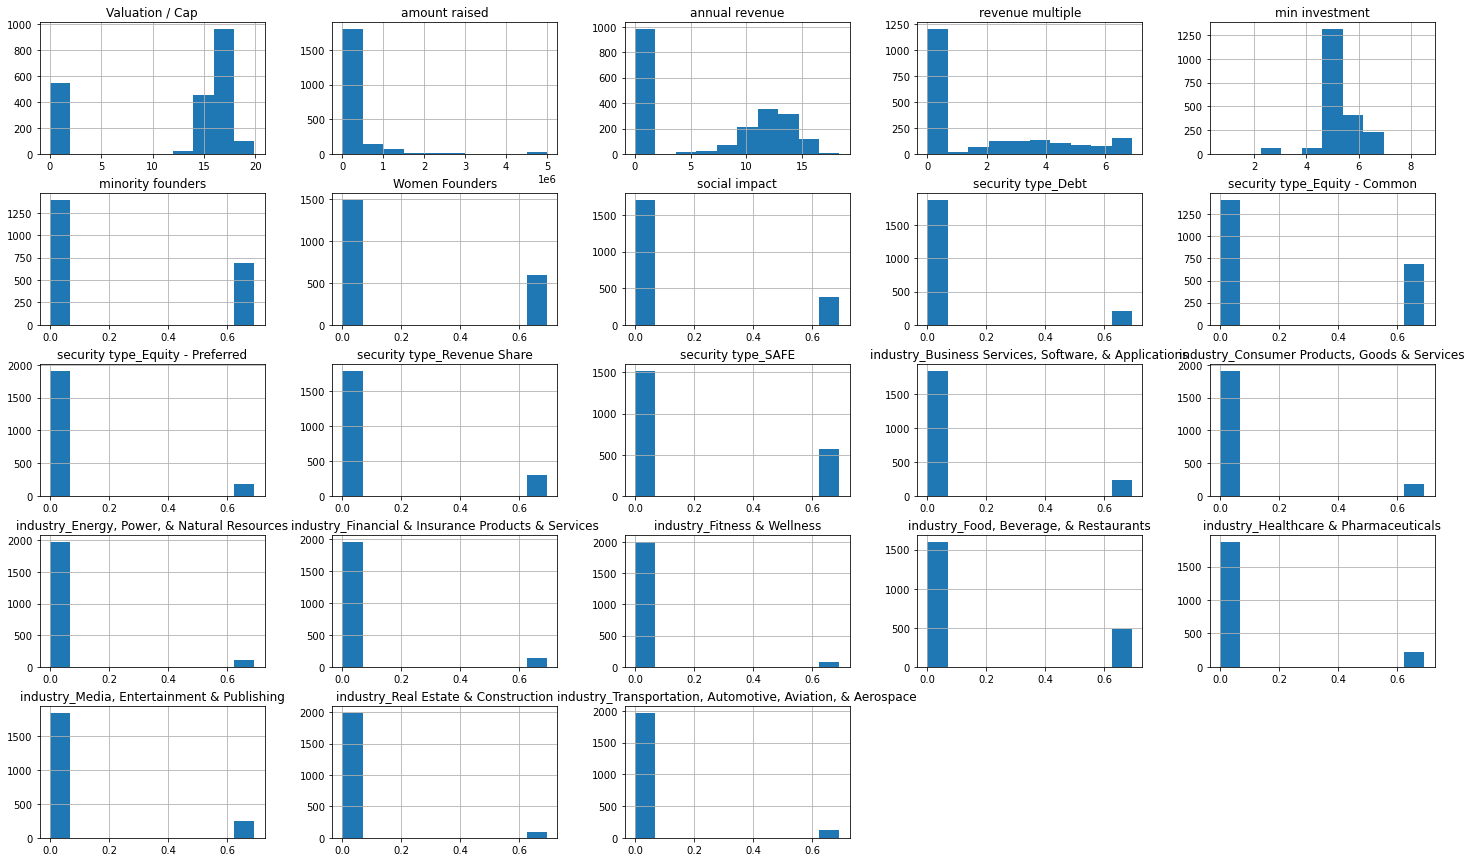

In [161]:
cfdummies.hist(figsize  = [25, 15])

We are seeing some improvements in p_values for our variables but r squared has gone down to an abysmal 9.6.  Lets try standardizing our data.

In [164]:
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

normdum = cfdummies.apply(normalize)

normdum.head()

Valuation / Cap  amount raised  annual revenue  revenue multiple  \
0         0.647746      -0.375089        1.439985         -0.070580   
1         0.503423      -0.093576        0.765928          1.198509   
2         0.678423      -0.262579        1.000476          1.115876   
3         0.491103      -0.314224        1.155139          0.166227   
4         0.577521      -0.362726        0.363437          2.195083   

   min investment  minority founders  Women Founders  social impact  \
0       -0.442923           1.417431       -0.632516      -0.474799   
1        0.659657          -0.705164       -0.632516      -0.474799   
2       -0.442923          -0.705164       -0.632516      -0.474799   
3       -0.442923          -0.705164       -0.632516       2.105148   
4        0.390595           1.417431       -0.632516      -0.474799   

   security type_Debt  security type_Equity - Common  \
0           -0.333077                      -0.694554   
1           -0.333077                      -0.694554   
2           -0.333077                      -0.694554   
3           -0.333077                      -0.694554   
4           -0.333077                       1.439084   

   security type_Equity - Preferred  security type_Revenue Share  \
0                         -0.307684                    -0.408265   
1                         -0.307684                    -0.408265   
2                         -0.307684                    -0.408265   
3                         -0.307684                    -0.408265   
4                         -0.307684                    -0.408265   

   security type_SAFE  industry_Business Services, Software, & Applications  \
0            1.633677                                          -0.359052      
1            1.633677                                          -0.359052      
2            1.633677                                          -0.359052      
3           -0.611824                                          -0.359052      
4           -0.611824                                          -0.359052      

   industry_Consumer Products, Goods & Services  \
0                                     -0.304884   
1                                     -0.304884   
2                                     -0.304884   
3                                     -0.304884   
4                                     -0.304884   

   industry_Energy, Power, & Natural Resources  \
0                                    -0.236655   
1                                    -0.236655   
2                                    -0.236655   
3                                    -0.236655   
4                                    -0.236655   

   industry_Financial & Insurance Products & Services  \
0                                          -0.262584    
1                                          -0.262584    
2                                          -0.262584    
3                                          -0.262584    
4                                          -0.262584    

   industry_Fitness & Wellness  industry_Food, Beverage, & Restaurants  \
0                     -0.20321                                1.812544   
1                     -0.20321                               -0.551447   
2                     -0.20321                               -0.551447   
3                     -0.20321                                1.812544   
4                     -0.20321                               -0.551447   

   industry_Healthcare & Pharmaceuticals  \
0                              -0.339240   
1                               2.946359   
2                              -0.339240   
3                              -0.339240   
4                               2.946359   

   industry_Media, Entertainment & Publishing  \
0                                   -0.366641   
1                                   -0.366641   
2                                   -0.366641   
3                                   -0.366641   
4                     

In [165]:
# create predictors
predictors = normdum.drop(['amount raised'], axis=1)

# create model intercept
predictors_int = sm.add_constant(predictors)

# fit model to data
model = sm.OLS(normdum['amount raised'],predictors_int.astype(float)).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          amount raised   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     9.962
Date:                Sat, 25 Feb 2023   Prob (F-statistic):           1.70e-32
Time:                        16:39:32   Log-Likelihood:                -2862.6
No. Observations:                2092   AIC:                             5771.
Df Residuals:                    2069   BIC:                             5901.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                      -9.888e-17      0.021  -4.73e-15      1.000      -0.041       0.041
Valuation / Cap                                                0.4092      0.062      6.564      0.000       0.287       0.532
annual revenue                                                 0.1122      0.028      3.952      0.000       0.057       0.168
revenue multiple                                              -0.0400      0.030     -1.334      0.182      -0.099       0.019
min investment                                                 0.0184      0.025      0.749      0.454      -0.030       0.067
minority founders                                             -0.0442      0.022     -2.057      0.040      -0.086      -0.002
Women Founders                                                -0.0185      0.022     -0.847      0.397      -0.061       0.024
social impact                                                  0.0162      0.023      0.704      0.482      -0.029       0.061
security type_Debt                                             0.2269      0.051      4.450      0.000       0.127       0.327
security type_Equity - Common                                  0.0587      0.041      1.439      0.150      -0.021       0.139
security type_Equity - Preferred                               0.1184      0.030      3.949      0.000       0.060       0.177
security type_Revenue Share                                    0.2783      0.056      4.935      0.000       0.168       0.389
security type_SAFE                                             0.0758      0.040      1.917      0.055      -0.002       0.153
industry_Business Services, Software, & Applications           0.0269      0.032      0.842      0.400      -0.036       0.090
industry_Consumer Products, Goods & Services                  -0.0054      0.029     -0.187      0.852      -0.063       0.052
industry_Energy, Power, & Natural Resources                    0.0883      0.029      3.085      0.002       0.032       0.144
industry_Financial & Insurance Products & Services             0.0915      0.028      3.232      0.001       0.036       0.147
industry_Fitness & Wellness                                   -0.0100      0.025     -0.393      0.694      -0.060       0.040
industry_Food, Beverage, & Restaurants                         0.0104      0.036      0.287      0.774      -0.061       0.082
industry_Healthcare & Pharmaceuticals                          0.0232      0.031      0.739      0.460      -0.038       0.085
industry_Media, Entertainment & Publishing                    -0.0052      0.032     -0.162      0.871      -0.067       0.057
industry_Real Estate & Construction

There are certain columns that continue to have unusable p values, lets drop them and see if the model improves.

In [166]:
cfdummies.drop(columns=['revenue multiple', 'min investment', 'Women Founders', 'social impact', 'security type_Equity - Common', 'industry_Business Services, Software, & Applications', 'industry_Consumer Products, Goods & Services', 'industry_Fitness & Wellness', 'industry_Food, Beverage, & Restaurants', 'industry_Healthcare & Pharmaceuticals', 'industry_Media, Entertainment & Publishing', 'security type_SAFE'], inplace = True)

In [167]:
# create predictors
predictors = cfdummies.drop(['amount raised'], axis=1)

# create model intercept
predictors_int = sm.add_constant(predictors)

# fit model to data
model = sm.OLS(cfdummies['amount raised'],predictors_int.astype(float)).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          amount raised   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     20.89
Date:                Sat, 25 Feb 2023   Prob (F-statistic):           2.14e-37
Time:                        16:39:36   Log-Likelihood:                -31018.
No. Observations:                2092   AIC:                         6.206e+04
Df Residuals:                    2081   BIC:                         6.212e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                      -4.004e+05   9.56e+04     -4.187      0.000   -5.88e+05   -2.13e+05
Valuation / Cap                                              3.91e+04   5845.405      6.690      0.000    2.76e+04    5.06e+04
annual revenue                                              9551.3661   2444.910      3.907      0.000    4756.641    1.43e+04
minority founders                                          -8.907e+04   4.49e+04     -1.984      0.047   -1.77e+05   -1008.877
security type_Debt                                           6.29e+05   1.53e+05      4.124      0.000     3.3e+05    9.28e+05
security type_Equity - Preferred                            3.038e+05   7.64e+04      3.977      0.000    1.54e+05    4.54e+05
security type_Revenue Share                                   6.6e+05   1.46e+05      4.525      0.000    3.74e+05    9.46e+05
industry_Energy, Power, & Natural Resources                 3.992e+05   9.61e+04      4.156      0.000    2.11e+05    5.88e+05
industry_Financial & Insurance Products & Services          3.578e+05   8.73e+04      4.098      0.000    1.87e+05    5.29e+05
industry_Real Estate & Construction                         5.273e+05   1.03e+05      5.144      0.000    3.26e+05    7.28e+05
industry_Transportation, Automotive, Aviation, & Aerospace   3.07e+05   9.27e+04      3.310      0.001    1.25e+05    4.89e+05
==============================================================================
Omnibus:                     1990.603   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            66670.984
Skew:                           4.671   Prob(JB):                         0.00
Kurtosis:                      29.030   Cond. No.                         239.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Ultimately the results on the linear regression are disappointing and it seems like the data is not linear.  Perhaps we will have more luck with decision trees and random forest which do not require linear data.

## Modeling

Now that we have an understanding of the key features involved, we are going to see if we can create effective predictive models. First we will do a decision tree and then a random forest model.  But this time we are going to take a slightly different approach have use a classification decision tree instead of continuous regression.  Ultimately we don't need to know how much money is going to be raised, only if the raise will be successful, so we will drop amount raised and success will be our target variable.

### Decision Tree

In [245]:
# Create a list of all the categorical features
cols_to_transform = ['security type', 'industry']
# Create a dataframe with the new dummy columns created from the cols_to_transform list
cfdum = pd.get_dummies(data=cfidummy, columns=cols_to_transform, drop_first=True)
cfdum= cfdum.drop(['company', 'status', 'reg type', 'momentum', 'average daily raise', 'platform', 'investors', 'amount raised','start date', 'close date'], axis=1)
cfdum


Valuation / Cap  annual revenue  revenue multiple  min investment  \
0            20000000         4943466               4.0             100   
1             7000000           72690              96.3             250   
2            25000000          315603              79.2             100   
3             6400000          831044               7.7             100   
4            12000000            5850            1000.0             200   
...               ...             ...               ...             ...   
2435                0               0               0.0             100   
2436                0               0               0.0             100   
2437          9000000          317176              28.4             100   
2438          5000000               0               0.0             100   
2439                0           31304               0.0             100   

      minority founders  Women Founders  social impact  success  \
0                  True           False          False    False   
1                 False           False          False    False   
2                 False           False          False    False   
3                 False           False           True    False   
4                  True           False          False    False   
...                 ...             ...            ...      ...   
2435              False           False          False    False   
2436              False            True           True    False   
2437               True           False          False    False   
2438              False           False           True    False   
2439              False           False          False    False   

      security type_Debt  security type_Equity - Common  \
0                      0                              0   
1                      0                              0   
2                      0                              0   
3                      0                              0   
4                      0                              1   
...                  ...                            ...   
2435                   0                              0   
2436                   0                              0   
2437                   0                              0   
2438                   0                              0   
2439                   0                              0   

      security type_Equity - Preferred  security type_Revenue Share  \
0                                    0                            0   
1                                    0                            0   
2                                    0                            0   
3                                    0                            0   
4                                    0                            0   
...                                ...                          ...   
2435                                 0                            1   
2436                                 0                            1   
2437                                 0                            0   
2438                                 0                            0   
2439                                 0                            1   

      security type_SAFE  \
0                      1   
1                      1   
2                      1   
3                      0   
4                      0   
...                  ...   
2435                   0   
2436                   0   
2437                   1   
2438                   0   
2439                   0   

      industry_Business Services, Software, & Applications  \
0                                                     0      
1                                                     0      
2                                                     0      
3                                                     0      
4                                                     0      
...                          

In [179]:
#split the variables
y= cfdum['success']
X= cfdum.drop(['success'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [175]:
#definition
def model_predictions(model, x_train, x_test, y_train, y_test):
    '''Enter model name and test/train sets to generate predictions, precision, recall, accuracy, and F1 score'''
    model.fit(x_train, y_train)
    y_hat_train = model.predict(x_train)
    y_hat_test = model.predict(x_test)
    print('Training Precision: ', precision_score(y_train, y_hat_train, average='weighted'))
    print('Testing Precision: ', precision_score(y_test, y_hat_test, average='macro'))
    print('-----')

    print('Training Recall: ', recall_score(y_train, y_hat_train))
    print('Testing Recall: ', recall_score(y_test, y_hat_test))
    print('-----')

    print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
    print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))
    print('-----')

    print('Training F1-Score: ', f1_score(y_train, y_hat_train))
    print('Testing F1-Score: ', f1_score(y_test, y_hat_test))

In [176]:
# splitting test and training data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= .2, random_state=42)

scaler= StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

dtree= DecisionTreeClassifier(random_state=42)
dtree.fit(X_train_scaled, y_train)

model_predictions(dtree, X_train_scaled, X_test_scaled, y_train, y_test)

Training Precision:  0.9970081827867162
Testing Precision:  0.5954795204795205
-----
Training Recall:  0.9821428571428571
Testing Recall:  0.2833333333333333
-----
Training Accuracy:  0.9970113568439928
Testing Accuracy:  0.8066825775656324
-----
Training F1-Score:  0.9887640449438202
Testing F1-Score:  0.2956521739130435


In this model we are interested in predicting which offerings are successful so we can invest in them.  Its ok if we miss some that turned out to be successful as long as the ones we pick are successful.  That makes precision much more important than recall and accuracy.

In [178]:
plt.figure(figsize=(12,12), dpi=500, edgecolor='black')

tree.plot_tree(dtree, 
               feature_names=X.columns,
               class_names=np.unique(y).astype('str'),
               filled=True, rounded=True)
plt.show()

In [186]:
def plot_roc_proba(model, X_train, X_test, y_train, y_test):
    '''Plot ROC for test set and train set with predict_proba'''
    y_test_score = model.predict_proba(X_test_scaled)
    y_train_score = model.predict_proba(X_train_scaled)

    train_fpr, train_tpr, train_thresholds = metrics.roc_curve(y_train, y_train_score[:,1])
    test_fpr, test_tpr, test_thresholds = metrics.roc_curve(y_test, y_test_score[:,1])

    plt.figure(figsize = (6, 6))
    plt.plot(train_fpr, train_tpr, color = 'purple', label = 'Train ROC curve')
    plt.plot(test_fpr, test_tpr, color = 'red', label = 'Test ROC curve')
    plt.plot([0,1], [0,1], color = 'black', linestyle ='--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])
    plt.xticks(rotation = 90)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
    print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))

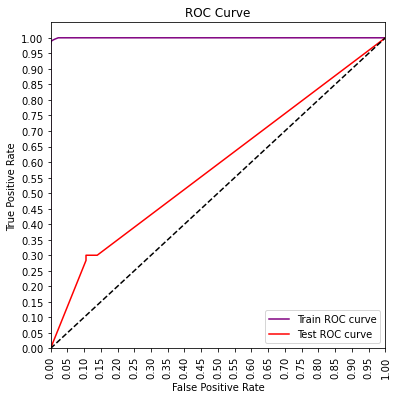

Train AUC: 0.9998644385290348
Test AUC: 0.584493964716806


In [187]:
#ROC curve
plot_roc_proba(dtree, X_train_scaled, X_test_scaled, y_train, y_test)

In [188]:
def confusion_matrix(model, x_test, y_test):
    '''Plot confusion matrix with test set'''
    plot_confusion_matrix(model, x_test, y_test, cmap=plt.cm.cool)
    plt.show()

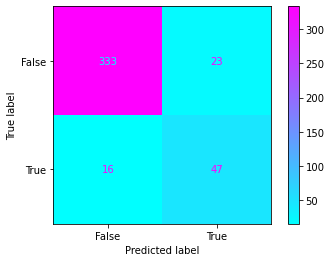

In [198]:
#confusion matrix
confusion_matrix(dtree, X_test_scaled, y_test)

### Decision Tree Hyptertuning

We are going to try to improve accuracy.

Because there is an imbalanced classification columns in the data, we are using SMOTE and RandomOverSampler to synthesize new examples from the minority class.

In [224]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state= 420)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Initiate sampling class
smote1 = SMOTE(sampling_strategy='minority', random_state=420)
# Fit and apply the transform
X_train_over, y_train_over = smote1.fit_resample(X_train_scaled, y_train)
# Summarize class distribution
print(Counter(y_train_over))

dtree1 = DecisionTreeClassifier(random_state=420)                       

dtree1.fit(X_train_over, y_train_over)

Counter({False: 1452, True: 1452})


DecisionTreeClassifier(random_state=420)

In [191]:
#model predictions with SMOTE
model_predictions(dtree1, X_train_over, X_test_scaled, y_train_over, y_test)

Training Precision:  0.9972536698370417
Testing Precision:  0.6355869740016081
-----
Training Recall:  0.9951790633608816
Testing Recall:  0.5238095238095238
-----
Training Accuracy:  0.9972451790633609
Testing Accuracy:  0.7899761336515513
-----
Training F1-Score:  0.997239475500345
Testing F1-Score:  0.4285714285714286


In [192]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=420)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Initiate sampling class
oversample = RandomOverSampler(sampling_strategy='minority', random_state=420)
# Fit and apply the transform
X_train_over1, y_train_over1 = oversample.fit_resample(X_train_scaled, y_train)
# Summarize class distribution
print(Counter(y_train_over))

dtree2 = DecisionTreeClassifier(random_state=420)                       

dtree2.fit(X_train_over, y_train_over)

Counter({False: 1452, True: 1452})


DecisionTreeClassifier(random_state=420)

In [193]:
#model predictions with randomoversampler
model_predictions(dtree2, X_train_over1, X_test_scaled, y_train_over1, y_test)

Training Precision:  0.9917504648427125
Testing Precision:  0.5715182157200229
-----
Training Recall:  0.9889807162534435
Testing Recall:  0.3492063492063492
-----
Training Accuracy:  0.9917355371900827
Testing Accuracy:  0.7565632458233891
-----
Training F1-Score:  0.9917127071823205
Testing F1-Score:  0.3013698630136986


SMOTE is the stronger method and our precision has improved to 63.5

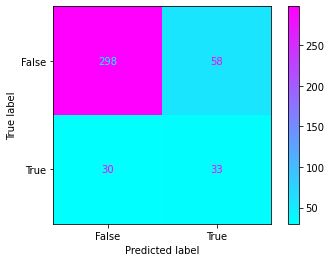

In [221]:
#confusion matrix with SMOTE
confusion_matrix(dtree1, X_test_scaled, y_test)

### Gridsearch

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=420)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

dtree_gs = DecisionTreeClassifier(random_state=420)

dtree_grid = {
           'class_weight': ['None', 'balanced'],
           'criterion': ['gini', 'entropy'],
           'max_depth': [20, 21, 22, 25, 30, 35],
           'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
           'min_samples_split': [1, 2, 3, 5, 10],
           'random_state': [420]
          }

gs_tree = GridSearchCV(estimator = dtree_gs, 
                             param_grid = dtree_grid, 
                             cv=5, 
                             return_train_score=True)

gs_tree.fit(X_train_scaled, y_train)

print('Best parameters for Our Decision Tree Model:')
gs_tree.best_params_

Best parameters for Our Decision Tree Model:


{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 21,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'random_state': 420}

In [226]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=420)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


final_dtree = DecisionTreeClassifier(class_weight = 'balanced',
 criterion = 'gini',
 max_depth = 21,
 min_samples_leaf =1,
 min_samples_split = 2, random_state=420)                       

final_dtree.fit(X_train_scaled, y_train)

model_predictions(final_dtree, X_train_scaled, X_test_scaled, y_train, y_test)

Training Precision:  0.990325920639859
Testing Precision:  0.6156526548672566
-----
Training Recall:  0.9909502262443439
Testing Recall:  0.42857142857142855
-----
Training Accuracy:  0.9898386132695756
Testing Accuracy:  0.7875894988066826
-----
Training F1-Score:  0.9626373626373627
Testing F1-Score:  0.37762237762237766


Gridsearch is suboptimal compared to SMOTE.  Our key diagnostic is precision, and the best result from decision tree is 63.5.

### K-Nearest Neighbor

In [227]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 420)
# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Instantiate KNeighborsClassifier
knn = KNeighborsClassifier()

In [228]:
#check knn predictions
model_predictions(knn, x_train_scaled, x_test_scaled, y_train, y_test)

Training Precision:  0.8674684864636732
Testing Precision:  0.6250530635347389
-----
Training Recall:  0.2398190045248869
Testing Recall:  0.2222222222222222
-----
Training Accuracy:  0.8852361028093245
Testing Accuracy:  0.8281622911694511
-----
Training F1-Score:  0.35570469798657717
Testing F1-Score:  0.28


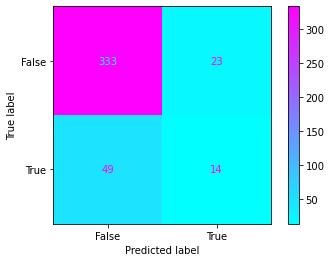

In [220]:
confusion_matrix(knn, x_test_scaled, y_test)

In [222]:
#defining best k
def find_best_k(x_train_scaled, y_train, x_test_scaled, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(x_train_scaled, y_train)
        train_score = knn.score(x_train_scaled, y_train)
        test_score = knn.score(x_test_scaled, y_test)
        if test_score > best_score:
            best_k = k
            best_score = test_score
    
    print("Best Value for k: {}".format(best_k))
    
find_best_k(x_train_scaled, y_train, x_test_scaled, y_test)

Best Value for k: 19


In [230]:
#defining kn classifier
knn_19 = KNeighborsClassifier(n_neighbors=19)

In [232]:
#viewing model scores
model_predictions(knn_19, x_train_scaled, x_test_scaled, y_train, y_test)

Training Precision:  0.8486862729804735
Testing Precision:  0.9289156626506024
-----
Training Recall:  0.03167420814479638
Testing Recall:  0.06349206349206349
-----
Training Accuracy:  0.8702928870292888
Testing Accuracy:  0.8591885441527446
-----
Training F1-Score:  0.0606060606060606
Testing F1-Score:  0.11940298507462686


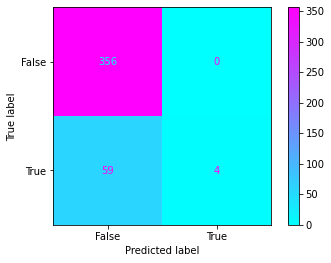

In [234]:
#confusion matrix
confusion_matrix(knn_19, x_test_scaled, y_test)

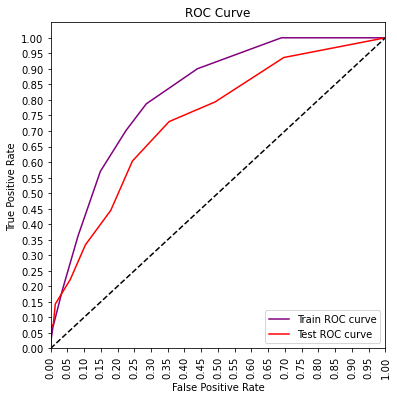

Train AUC: 0.8194470413721751
Test AUC: 0.7342830390583199


In [235]:
#ROC curve
plot_roc_proba(knn_19, X_train_scaled, X_test_scaled, y_train, y_test)

With KNN we have an awful recall of .06 meaning we are missing on 94 percent of successes. But we picked 4 and all were true thus we have a high precision score which is what we are after.

### Random Forest Classifier

In [236]:
X = cfdum.drop(['success'], axis=1)
y = cfdum['success']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=25)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [237]:
rfc = RandomForestClassifier(class_weight='balanced')
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced')

In [239]:
#viewing model scores
model_predictions(rfc, X_train_scaled, X_test_scaled, y_train, y_test)

Training Precision:  0.9955491760137039
Testing Precision:  0.6896378269617707
-----
Training Recall:  0.985781990521327
Testing Recall:  0.1780821917808219
-----
Training Accuracy:  0.9955385595920969
Testing Accuracy:  0.8604206500956023
-----
Training F1-Score:  0.983451536643026
Testing F1-Score:  0.2626262626262626


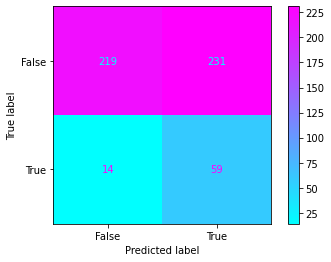

In [238]:
#confusion matrix
confusion_matrix(rfc, X_test, y_test)

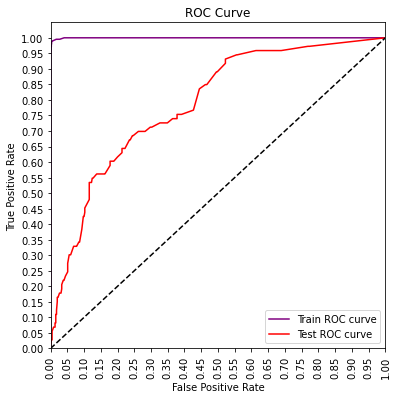

Train AUC: 0.9991310053116864
Test AUC: 0.7870776255707762


In [240]:
plot_roc_proba(rfc, X_train, X_test, y_train, y_test)

In [268]:
#from sklearn.model_selection import RandomizedSearchCV
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import GridSearchCV
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=420)
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

#rf_gs = RandomForestClassifier(random_state=420)

#rf_grid = {'criterion': ['gini', 'entropy'],
    #'max_depth': [10, 20, 30],
    #'max_features': ['auto', 'sqrt', 'log2'],
    #'min_samples_leaf': [1, 2, 4],
    #'min_samples_split': [2, 5, 10],
    #'n_estimators': [200, 400, 600, 800, 1000]}

#gs_rforest = GridSearchCV(estimator = rf_gs, 
                             #param_grid = rf_grid, 
                             #cv=5, 
                             #return_train_score=True)

#gs_rforest.fit(X_train_scaled, y_train)

#print('Best parameters for Our Decision Tree Model:')
#gs_rforest.best_params_

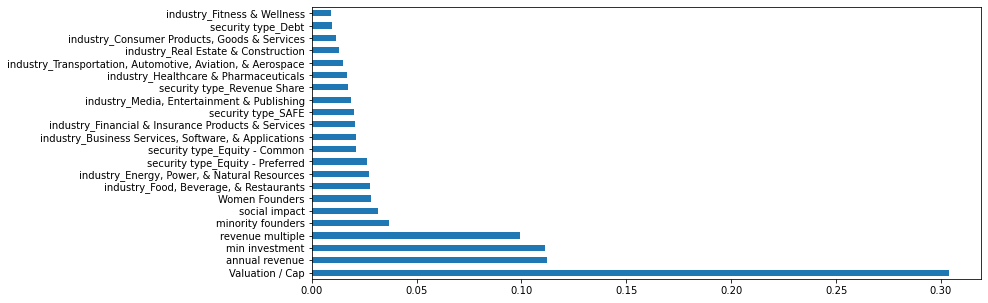

In [241]:
# Feature importance
feat_importances = pd.Series(rfc.feature_importances_, index=X_train.columns)
feat_importances.nlargest(28).plot(kind='barh', figsize=(12,5))
plt.show()

The most important features are annual Valuation/Cap and annual revenue.  Although our KNN model had a precision of 93, I question how reliable it is as it only made an estimation of 4 trues that were all correct.  Perhaps there are occasions when the stars align and that is something to look our for.  The random forest model had precision of 68 which is slightly higher than the average of the other models. 

## New Idea

If I am interested in investing in a company's offering expenses, there are presumably things I can influence such as min investment, and security type offered.  I already have an idea of which have shown best results.  Lets look at these models with only the fixed variables in place.

In [249]:
# Create a list of all the categorical features
cols_to_transform2 = ['industry']
# Create a dataframe with the new dummy columns created from the cols_to_transform list
cfdum0 = pd.get_dummies(data=cfidummy, columns=cols_to_transform2, drop_first=True)
cfdum0= cfdum0.drop(['company', 'status', 'reg type', 'momentum', 'average daily raise', 'platform','investors', 'amount raised','start date', 'close date', 'min investment', 'security type'], axis=1)
cfdum0


Valuation / Cap  annual revenue  revenue multiple  minority founders  \
0            20000000         4943466               4.0               True   
1             7000000           72690              96.3              False   
2            25000000          315603              79.2              False   
3             6400000          831044               7.7              False   
4            12000000            5850            1000.0               True   
...               ...             ...               ...                ...   
2435                0               0               0.0              False   
2436                0               0               0.0              False   
2437          9000000          317176              28.4               True   
2438          5000000               0               0.0              False   
2439                0           31304               0.0              False   

      Women Founders  social impact  success  \
0              False          False    False   
1              False          False    False   
2              False          False    False   
3              False           True    False   
4              False          False    False   
...              ...            ...      ...   
2435           False          False    False   
2436            True           True    False   
2437           False          False    False   
2438           False           True    False   
2439           False          False    False   

      industry_Business Services, Software, & Applications  \
0                                                     0      
1                                                     0      
2                                                     0      
3                                                     0      
4                                                     0      
...                                                 ...      
2435                                                  0      
2436                                                  0      
2437                                                  0      
2438                                                  0      
2439                                                  0      

      industry_Consumer Products, Goods & Services  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   
...                                            ...   
2435                                             0   
2436                                             0   
2437                                             0   
2438                                             0   
2439                                             0   

      industry_Energy, Power, & Natural Resources  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   
...                                           ...   
2435                                            0   
2436                                            0   
2437                                            0   
2438                                            0   
2439                                            0   

      industry_Financial & Insurance Products & Services  \
0                                                     0    
1                                                     0    
2                                                     0    
3                                                     0    
4                                                     0    
...                                                 ...    
2435                                     

In [250]:
#split the variables
y= cfdum0['success']
X= cfdum0.drop(['success'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Baseline Random Tree

In [251]:

# splitting test and training data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= .2, random_state=42)

scaler= StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

dtree= DecisionTreeClassifier(random_state=42)
dtree.fit(X_train_scaled, y_train)

model_predictions(dtree, X_train_scaled, X_test_scaled, y_train, y_test)

Training Precision:  0.9940095300772039
Testing Precision:  0.5969026548672566
-----
Training Recall:  0.9642857142857143
Testing Recall:  0.4
-----
Training Accuracy:  0.9940227136879857
Testing Accuracy:  0.7804295942720764
-----
Training F1-Score:  0.9773755656108598
Testing F1-Score:  0.34285714285714286


#### Random Tree Model with SMOTE

In [252]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state= 420)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Initiate sampling class
smote1 = SMOTE(sampling_strategy='minority', random_state=420)
# Fit and apply the transform
X_train_over, y_train_over = smote1.fit_resample(X_train_scaled, y_train)
# Summarize class distribution
print(Counter(y_train_over))

dtree1 = DecisionTreeClassifier(random_state=420)                       

dtree1.fit(X_train_over, y_train_over)

Counter({False: 1452, True: 1452})


DecisionTreeClassifier(random_state=420)

In [253]:
#model predictions with SMOTE
model_predictions(dtree1, X_train_over, X_test_scaled, y_train_over, y_test)

Training Precision:  0.9951875188543393
Testing Precision:  0.5705367706581979
-----
Training Recall:  0.9931129476584022
Testing Recall:  0.4126984126984127
-----
Training Accuracy:  0.9951790633608816
Testing Accuracy:  0.7326968973747017
-----
Training F1-Score:  0.9951690821256038
Testing F1-Score:  0.3170731707317073


#### Random Tree with OverSampler

In [254]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=420)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Initiate sampling class
oversample = RandomOverSampler(sampling_strategy='minority', random_state=420)
# Fit and apply the transform
X_train_over1, y_train_over1 = oversample.fit_resample(X_train_scaled, y_train)
# Summarize class distribution
print(Counter(y_train_over))

dtree2 = DecisionTreeClassifier(random_state=420)                       

dtree2.fit(X_train_over, y_train_over)

Counter({False: 1452, True: 1452})


DecisionTreeClassifier(random_state=420)

In [255]:
#model predictions with randomoversampler
model_predictions(dtree2, X_train_over1, X_test_scaled, y_train_over1, y_test)

Training Precision:  0.9882929374377462
Testing Precision:  0.59973077836725
-----
Training Recall:  0.987603305785124
Testing Recall:  0.36507936507936506
-----
Training Accuracy:  0.9882920110192838
Testing Accuracy:  0.7852028639618138
-----
Training F1-Score:  0.9882839421088904
Testing F1-Score:  0.3382352941176471


#### Random Tree with GridSearch

In [256]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=420)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

dtree_gs = DecisionTreeClassifier(random_state=420)

dtree_grid = {
           'class_weight': ['None', 'balanced'],
           'criterion': ['gini', 'entropy'],
           'max_depth': [20, 21, 22, 25, 30, 35],
           'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
           'min_samples_split': [1, 2, 3, 5, 10],
           'random_state': [420]
          }

gs_tree = GridSearchCV(estimator = dtree_gs, 
                             param_grid = dtree_grid, 
                             cv=5, 
                             return_train_score=True)

gs_tree.fit(X_train_scaled, y_train)

print('Best parameters for Our Decision Tree Model:')
gs_tree.best_params_

Best parameters for Our Decision Tree Model:


{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 22,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'random_state': 420}

In [257]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=420)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


final_dtree = DecisionTreeClassifier(class_weight = 'balanced',
 criterion = 'gini',
 max_depth = 22,
 min_samples_leaf =1,
 min_samples_split = 2, random_state=420)                       

final_dtree.fit(X_train_scaled, y_train)

model_predictions(final_dtree, X_train_scaled, X_test_scaled, y_train, y_test)

Training Precision:  0.9838080709999426
Testing Precision:  0.5892283587935762
-----
Training Recall:  0.9909502262443439
Testing Recall:  0.3492063492063492
-----
Training Accuracy:  0.982068141063957
Testing Accuracy:  0.7780429594272077
-----
Training F1-Score:  0.935897435897436
Testing F1-Score:  0.32116788321167883


#### KNN

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 420)
# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Instantiate KNeighborsClassifier
knn = KNeighborsClassifier()

In [258]:
#check knn predictions
model_predictions(knn, x_train_scaled, x_test_scaled, y_train, y_test)

Training Precision:  0.8674684864636732
Testing Precision:  0.6250530635347389
-----
Training Recall:  0.2398190045248869
Testing Recall:  0.2222222222222222
-----
Training Accuracy:  0.8852361028093245
Testing Accuracy:  0.8281622911694511
-----
Training F1-Score:  0.35570469798657717
Testing F1-Score:  0.28


#### Random Forest

In [259]:
X = cfdum0.drop(['success'], axis=1)
y = cfdum0['success']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=25)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [260]:
rfc = RandomForestClassifier(class_weight='balanced')
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced')

In [261]:
#viewing model scores
model_predictions(rfc, X_train_scaled, X_test_scaled, y_train, y_test)

Training Precision:  0.9911193548842383
Testing Precision:  0.5923918423918424
-----
Training Recall:  0.9715639810426541
Testing Recall:  0.1780821917808219
-----
Training Accuracy:  0.9910771191841937
Testing Accuracy:  0.8298279158699808
-----
Training F1-Score:  0.9669811320754718
Testing F1-Score:  0.22608695652173913


## Conclusion

Unfortunately, just looking at a companies basic financials, industry and ESG component is not enough to successfully predict if the raise will be successful.  We do know that there are certain things that can be done to improve the odds of an offering such as setting its minimum investment to 250 and security type to preferred equity.  We also know that investors are not afraid of big valuations, in fact companies with higher valuations tend to perform better.  Also, being prerevenue won't hold back your fundraising success.  Only 13 percent of companies hit that 500k success mark, but at least we know there are ways to increase your chances.  

Ultimately using random forest we can expect to predict 68% of the time which companies will be successful.  Ideally would like to get this number above 85%.

### Next Steps

We need more data indicative of a successful raise.  Previous funding rounds, CEO previous sucesses, more explicit industry listings, marketing budgets, and more.